# MLB
### Data from:  https://rdrr.io/cran/Lahman/man/Teams.html 
#### Source: Lahman, S. (2021) Lahman's Baseball Database, 1871-2020, 2020 version, https://www.seanlahman.com/baseball-archive/statistics/

#### Participants: Hyungi Kim(The University of Texas at Dallas), Myunghyun Pyo(Southern Methodist University)

## 1. Look around the data

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn")
sns.set(font_scale=1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)

In [2]:
#Import the dataset
df = pd.read_csv("Teams.csv")
df.tail(5)

yearID lgID teamID franchID divID  Rank    G  Ghome    W    L  ...   DP  \
2980    2021   NL    SLN      STL     C     2  162   81.0   90   72  ...  137   
2981    2021   AL    TBA      TBD     E     1  162   81.0  100   62  ...  130   
2982    2021   AL    TEX      TEX     W     5  162   81.0   60  102  ...  146   
2983    2021   AL    TOR      TOR     E     4  162   80.0   91   71  ...  122   
2984    2021   NL    WAS      WSN     E     5  162   81.0   65   97  ...  116   

         FP                  name               park  attendance  BPF  PPF  \
2980  0.986   St. Louis Cardinals  Busch Stadium III   2102530.0   92   92   
2981  0.986        Tampa Bay Rays    Tropicana Field    761072.0   92   91   
2982  0.986         Texas Rangers   Globe Life Field   2110258.0   99  101   
2983  0.984     Toronto Blue Jays       Sahlen Field    805901.0  102  101   
2984  0.983  Washington Nationals     Nationals Park   1465543.0   95   96   

      teamIDBR  teamIDlahman45  teamIDretro  
2980       STL             SLN          SLN  
2981       TBR             TBA          TBA  
2982       TEX             TEX          TEX  
2983       TOR             TOR          TOR  
2984       WSN             MON          WAS  

[5 rows x 52 columns]

### Original Column descriptions:

### [Categorical/Class Variables] 
##### lgID: unique league identifier (6 possible classes or null)
##### teadID: unique team identifier (149 classes)
##### franchID: unique franchise identifier (120 classes)
##### divID: unique division identifier (3 classes)
##### DivWin: whether team won its division (Y, N, or null)
##### WCWin: whether team won a wild card spot (Y, N, or null)
##### LgWin: whether team won its league (Y, N, or null)
##### WSWin: whether team won the World Series (Y, N, or null)
##### name: team name (139 classes)
##### park: team home ballpark (212 classes)
##### teamIDBR: unique Baseball Reference team identifier (101 classes)
##### teamIDlahman45: unique Lahman database team identifier (148 classes)
##### teamIDretro: unique Retrosheet team identifier (149 classes)

### [Numerical/Continuous Variables]
##### yearID: calendar year (season)
##### Rank: ordered ranking of team's finish for its division (league_id and div_id)

### [Game outcomes]
##### G: games
##### Ghome: home games
##### W: wins
##### L: losses

### [Hitting]
##### R: runs
##### AB: at bats
##### H: hits
##### 2B: doubles
##### 3B: triples
##### HR: home runs
##### BB: walks
##### SO: strikeouts
##### SB: stolen bases
##### CS: caught stealing
##### HBP: hit by pitch
##### SF: sacrifice flies

### [Pitching]
##### RA: runs allowed
##### ER: earned runs
##### ERA: earned run average
##### CG: complete games
##### SHO: shutouts
##### SV: saves
##### Ipouts: outs pitched
##### HA: hits allowed
##### HRA: home runs allowed
##### BBA: walks allowed
##### SOA: strikeouts allowed

### [Fielding]
##### E: errors
##### DP: double plays
##### FP: fielding percentage

### [Home ballpark]
##### attendance: total attendance for home games
##### BPF: park factor for batters
##### PPF: park factor for pitchers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985 entries, 0 to 2984
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2985 non-null   int64  
 1   lgID            2935 non-null   object 
 2   teamID          2985 non-null   object 
 3   franchID        2985 non-null   object 
 4   divID           1468 non-null   object 
 5   Rank            2985 non-null   int64  
 6   G               2985 non-null   int64  
 7   Ghome           2586 non-null   float64
 8   W               2985 non-null   int64  
 9   L               2985 non-null   int64  
 10  DivWin          1440 non-null   object 
 11  WCWin           804 non-null    object 
 12  LgWin           2957 non-null   object 
 13  WSWin           2628 non-null   object 
 14  R               2985 non-null   int64  
 15  AB              2985 non-null   int64  
 16  H               2985 non-null   int64  
 17  2B              2985 non-null   i

In [4]:
#Check for missing data
print("The total number of data: ", df.shape[0]*df.shape[1])
print("The total number of null values: {} and it occupies {:.2f}% of the toal  ".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))
print("The number of teams: ", df['franchID'].unique())
#print("The number of actions in the ga : ", data[''].nunique())
#print("The number of detail s: ", data['type'].nunique())

The total number of data:  155220
The total number of null values: 10064 and it occupies 6.48% of the toal  
The number of teams:  ['BNA' 'CNA' 'CFC' 'KEK' 'NNA' 'PNA' 'ROK' 'TRO' 'OLY' 'BLC' 'ECK' 'BRA'
 'MAN' 'NAT' 'MAR' 'RES' 'PWS' 'WBL' 'HNA' 'WES' 'NHV' 'CEN' 'SLR' 'SNA'
 'WNT' 'ATL' 'CHC' 'CNR' 'HAR' 'LGR' 'NYU' 'ATH' 'SBS' 'IBL' 'MLG' 'PRO'
 'BUF' 'CBL' 'SYR' 'TRT' 'WOR' 'DTN' 'BLO' 'CIN' 'LOU' 'PHA' 'PIT' 'STL'
 'CBK' 'SFG' 'NYP' 'PHI' 'ALT' 'BLU' 'LAD' 'BRD' 'CPI' 'COR' 'IHO' 'KCU'
 'MLU' 'PHK' 'RIC' 'SLM' 'STP' 'TOL' 'WIL' 'WST' 'WNA' 'KCN' 'WNL' 'CLV'
 'IND' 'KCC' 'CLS' 'BFB' 'BRG' 'BWW' 'BRS' 'CHP' 'CLI' 'NYI' 'PHQ' 'PBB'
 'ROC' 'SYS' 'TLM' 'CKK' 'MLA' 'WAS' 'NYY' 'BOS' 'CHW' 'CLE' 'DET' 'BAL'
 'OAK' 'MIN' 'BLT' 'BTT' 'BFL' 'CHH' 'NEW' 'KCP' 'PBS' 'SLI' 'ANA' 'TEX'
 'HOU' 'NYM' 'KCR' 'WSN' 'SDP' 'MIL' 'SEA' 'TOR' 'COL' 'FLA' 'ARI' 'TBD']


## 2. Data Preprocessing

In [5]:
df = df[df['yearID'] >= 1990] # Select recent 30 years seasons.
df = df[df['yearID'] != 1994] # Short season.
df = df[df['yearID'] != 2020] # no playoff season caused by players'STRIKE 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(50)

yearID lgID teamID franchID divID  Rank    G  Ghome    W    L DivWin  \
2047    1990   NL    ATL      ATL     W     6  162   81.0   65   97      N   
2048    1990   AL    BAL      BAL     E     5  161   80.0   76   85      N   
2049    1990   AL    BOS      BOS     E     1  162   81.0   88   74      Y   
2050    1990   AL    CAL      ANA     W     4  162   81.0   80   82      N   
2051    1990   AL    CHA      CHW     W     2  162   80.0   94   68      N   
2052    1990   NL    CHN      CHC     E     4  162   81.0   77   85      N   
2053    1990   NL    CIN      CIN     W     1  162   81.0   91   71      Y   
2054    1990   AL    CLE      CLE     E     4  162   81.0   77   85      N   
2055    1990   AL    DET      DET     E     3  162   81.0   79   83      N   
2056    1990   NL    HOU      HOU     W     4  162   81.0   75   87      N   
2057    1990   AL    KCA      KCR     W     6  161   81.0   75   86      N   
2058    1990   NL    LAN      LAD     W     2  162   81.0   86   76      N   
2059    1990   AL    MIN      MIN     W     7  162   81.0   74   88      N   
2060    1990   AL    ML4      MIL     E     6  162   81.0   74   88      N   
2061    1990   NL    MON      WSN     E     3  162   81.0   85   77      N   
2062    1990   AL    NYA      NYY     E     7  162   81.0   67   95      N   
2063    1990   NL    NYN      NYM     E     2  162   81.0   91   71      N   
2064    1990   AL    OAK      OAK     W     1  162   81.0  103   59      Y   
2065    1990   NL    PHI      PHI     E     4  162   81.0   77   85      N   
2066    1990   NL    PIT      PIT     E     1  162   81.0   95   67      Y   
2067    1990   NL    SDN      SDP     W     4  162   81.0   75   87      N   
2068    1990   AL    SEA      SEA     W     5  162   81.0   77   85      N   
2069    1990   NL    SFN      SFG     W     3  162   81.0   85   77      N   
2070    1990   NL    SLN      STL     E     6  162   81.0   70   92      N   
2071    1990   AL    TEX      TEX     W     3  162   82.0   83   79      N   
2072    1990   AL    TOR      TOR     E     2  162   81.0   86   76      N   
2073    1991   NL    ATL      ATL     W     1  162   81.0   94   68      Y   
2074    1991   AL    BAL      BAL     E     6  162   81.0   67   95      N   
2075    1991   AL    BOS      BOS     E     2  162   81.0   84   78      N   
2076    1991   AL    CAL      ANA     W     7  162   81.0   81   81      N   
2077    1991   AL    CHA      CHW     W     2  162   81.0   87   75      N   
2078    1991   NL    CHN      CHC     E     4  160   83.0   77   83      N   
2079    1991   NL    CIN      CIN     W     5  162   81.0   74   88      N   
2080    1991   AL    CLE      CLE     E     7  162   82.0   57  105      N   
2081    1991   AL    DET      DET     E     2  162   81.0   84   78      N   
2082    1991   NL    HOU      HOU     W     6  162   81.0   65   97      N   
2083    1991   AL    KCA      KCR     W     6  162   81.0   82   80      N   
2084    1991   NL    LAN      LAD     W     2  162   81.0   93   69      N   
2085    1991   AL    MIN      MIN     W     1  162   81.0   95   67      Y   
2086    1991   AL    ML4      MIL     E     4  162   80.0   83   79      N   
2087    1991   NL    MON      WSN     E     6  161   68.0   71   90      N   
2088    1991   AL    NYA      NYY     E     5  162   81.0   71   91      N   
2089    1991   NL    NYN      NYM     E     5  161   82.0   77   84      N   
2090    1991   AL    OAK      OAK     W     4  162   81.0   84   78      N   
2091    1991   NL    PHI      PHI     E     3  162   83.0   78   84      N   
2092    1991   NL    PIT      PIT     E     1  162   84.0   98   64      Y   
2093    1991   NL    SDN      SDP     W     3  162   81.0   84   78      N   
2094    1991   AL    SEA      SEA     W     5  162   81.0   83   79      N   
2095    1991   NL    SFN      SFG     W     4  162   81.0   75   87      N   
2096    1991   NL    SLN      STL     E     2  162   84.0   84   78      N   

     WCWin LgWin WSWin    R

In [6]:
#reset the index.
df = df.reset_index()
df = df.drop(["index"], axis=1)
pd.set_option('display.max_columns', None)
df.head(5)

yearID lgID teamID franchID divID  Rank    G  Ghome   W   L DivWin WCWin  \
0    1990   NL    ATL      ATL     W     6  162   81.0  65  97      N   NaN   
1    1990   AL    BAL      BAL     E     5  161   80.0  76  85      N   NaN   
2    1990   AL    BOS      BOS     E     1  162   81.0  88  74      Y   NaN   
3    1990   AL    CAL      ANA     W     4  162   81.0  80  82      N   NaN   
4    1990   AL    CHA      CHW     W     2  162   80.0  94  68      N   NaN   

  LgWin WSWin    R    AB     H   2B  3B   HR     BB      SO     SB    CS  \
0     N     N  682  5504  1376  263  26  162  473.0  1010.0   92.0  55.0   
1     N     N  669  5410  1328  234  22  132  660.0   962.0   94.0  52.0   
2     N     N  699  5516  1502  298  31  106  598.0   795.0   53.0  52.0   
3     N     N  690  5570  1448  237  27  147  566.0  1000.0   69.0  43.0   
4     N     N  682  5402  1393  251  44  106  478.0   903.0  140.0  90.0   

    HBP    SF        BA       OBP       SLG       OPS   RA   ER   ERA  CG  \
0  27.0  31.0  0.250000  0.312250  0.477471  0.789721  821  727  4.58  17   
1  40.0  41.0  0.245471  0.331861  0.441774  0.773635  698  644  4.04  10   
2  28.0  44.0  0.272299  0.345567  0.474075  0.819642  664  596  3.72  15   
3  28.0  45.0  0.259964  0.330367  0.465171  0.795538  706  613  3.79  21   
4  36.0  47.0  0.257867  0.321748  0.453721  0.775469  633  581  3.61  17   

   SHO  SV  IPouts    HA  HRA  BBA  SOA    E   DP     FP               name  \
0    8  30    4289  1527  128  579  938  158  133  0.974     Atlanta Braves   
1    5  43    4306  1445  161  537  776   93  151  0.985  Baltimore Orioles   
2   13  44    4326  1439   92  519  997  123  154  0.980     Boston Red Sox   
3   13  42    4362  1482  106  544  944  142  186  0.978  California Angels   
4   10  68    4348  1313  106  548  914  124  169  0.980  Chicago White Sox   

                            park  attendance  BPF  PPF teamIDBR  \
0  Atlanta-Fulton County Stadium    980129.0  105  106      ATL   
1               Memorial Stadium   2415189.0   97   98      BAL   
2                 Fenway Park II   2528986.0  105  105      BOS   
3                Anaheim Stadium   2555688.0   97   97      CAL   
4                  Comiskey Park   2002357.0   98   98      CHW   

  teamIDlahman45 teamIDretro  
0            ATL         ATL  
1            BAL         BAL  
2            BOS         BOS  
3            CAL         CAL  
4            CHA         CHA

In [7]:
df.isnull().sum()

yearID              0
lgID                0
teamID              0
franchID            0
divID               0
Rank                0
G                   0
Ghome               0
W                   0
L                   0
DivWin              0
WCWin             106
LgWin               0
WSWin               0
R                   0
AB                  0
H                   0
2B                  0
3B                  0
HR                  0
BB                  0
SO                  0
SB                  0
CS                  0
HBP                 0
SF                  0
BA                  0
OBP                 0
SLG                 0
OPS                 0
RA                  0
ER                  0
ERA                 0
CG                  0
SHO                 0
SV                  0
IPouts              0
HA                  0
HRA                 0
BBA                 0
SOA                 0
E                   0
DP                  0
FP                  0
name                0
park      

In [8]:
# The wildcard system had been entered in since 1994
df["WCWin"].fillna("N", inplace = True)
df["WCWin"].head(120)

0      N
1      N
2      N
3      N
4      N
5      N
6      N
7      N
8      N
9      N
10     N
11     N
12     N
13     N
14     N
15     N
16     N
17     N
18     N
19     N
20     N
21     N
22     N
23     N
24     N
25     N
26     N
27     N
28     N
29     N
30     N
31     N
32     N
33     N
34     N
35     N
36     N
37     N
38     N
39     N
40     N
41     N
42     N
43     N
44     N
45     N
46     N
47     N
48     N
49     N
50     N
51     N
52     N
53     N
54     N
55     N
56     N
57     N
58     N
59     N
60     N
61     N
62     N
63     N
64     N
65     N
66     N
67     N
68     N
69     N
70     N
71     N
72     N
73     N
74     N
75     N
76     N
77     N
78     N
79     N
80     N
81     N
82     N
83     N
84     N
85     N
86     N
87     N
88     N
89     N
90     N
91     N
92     N
93     N
94     N
95     N
96     N
97     N
98     N
99     N
100    N
101    N
102    N
103    N
104    N
105    N
106    N
107    N
108    N
109    N
110    N
1

In [9]:
#Check the duplicated values and erase one row, going to use franchID and change the name (refers to MLB Team abbreviations)
df['franchID'].unique()

array(['ATL', 'BAL', 'BOS', 'ANA', 'CHW', 'CHC', 'CIN', 'CLE', 'DET',
       'HOU', 'KCR', 'LAD', 'MIN', 'MIL', 'WSN', 'NYY', 'NYM', 'OAK',
       'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TEX', 'TOR', 'COL',
       'FLA', 'ARI', 'TBD'], dtype=object)

In [10]:
df['franchID'] = df['franchID'].replace({'ANA' : 'LAA', 'CHW' : 'CWS', 'FLA' : 'MIA', 'TBD' : 'TBR'})
df['franchID'].unique()

array(['ATL', 'BAL', 'BOS', 'LAA', 'CWS', 'CHC', 'CIN', 'CLE', 'DET',
       'HOU', 'KCR', 'LAD', 'MIN', 'MIL', 'WSN', 'NYY', 'NYM', 'OAK',
       'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TEX', 'TOR', 'COL',
       'MIA', 'ARI', 'TBR'], dtype=object)

### Added Column descriptions: 

### [Hitting]
##### 1B: singles 
##### BA: Batting Average   (The ratio of hits to at-bats)
##### OBP: On-Base Percentage   (The percentage of plate appearances resulting in the batter reaching bases)
##### SLG: Slugging Percentage   (A measure of the team's power-hitting ability, calculated as total bases divided by at-bats)
##### TB: Total Bases   (The sum of bases earned through singles, doubles, triples, and home runs)
##### OPS: On-Base Plus Slugging   (The sum of OBP and SLG)
##### GPA: Gross Production Average   (A measure of a player's overall offensive production, combining OBP and SLG)
##### TA: Total Average   (A metric considering total bases, walks, hit by pitch, stolen bases, and other factors per plate appearance)
##### PSN: Power-Speed Number   (A combined measure of player's home run and stolen base proficiency)
##### ISO: Isolated Power   (A measure of a team's raw power, calculated as SLG minus BA)
##### BABIP: Batting Average on Balls in Play   (The ratio of walks and hit by pitch to toal at-bats)

### [Pitching]
##### WHIP: Walks plus Hits per Inning Pitched   (A measure of a pitcher's effectiveness in preventing baserunners)
##### BAA: Batting Average Against   (The opposing batters' batting average against the team's pitchers)
##### K/BB: Strikeouts per Walk   (The ratio of strikeouts to walks, indicating a pitcher's control and dominance)
##### BB/HBP_ratio: Walks and Hit by Pitch Ratio   (The ratio of walks and hit by pitch to total at-bats)
##### IP: Inning Pitched   (The total number of innings pitched by the team's pitchers, converted from outs)


### Fielding
##### P%: Power Percentage   (The percentage of runs squared divided by the sum of runs squared and runs allowed squared, providing a measure of a team's power)
##### WP: The ratio of wins to total games played, indicating the team's winning rate.

In [11]:
#Add WP, BA, 1B, OBP, SLG, OPS, IP(IPouts/3), WHIP , TB, GPA, TA, PSN, ISO, BABIP, P%
#Add BAA(Batting Average Against), (BB/HBP_ratio = walk and hit by pitch ratio) , K/BB
df["WP"] = round(df["W"]/df["G"],3)
df["BA"] = round(df["H"]/df["AB"],3)
df["1B"] = df["H"] - df["HR"] - df["3B"] - df["2B"]
df["OBP"] = round((df["H"] + df["BB"] + df["HBP"] + df["SF"])/(df["AB"] + df["BB"] + df["HBP"] + df["SF"]),3)
df["SLG"] = round((df["1B"] + 2*df["2B"] + 3*df["3B"] + 4*df["HR"])/df["AB"],3)
df["TB"] = df["1B"] + 2*df["2B"] +3*df["3B"] + 4*df["HR"]
df["OPS"] = round(df["OBP"] + df["SLG"],3)
df["GPA"] = round((1.8*df["OBP"]+df["SLG"])/4,3)
df["TA"] = round((df["TB"]+df["HBP"]+df["BB"]+df["SB"])/(df["AB"]-df["H"]+df["CS"]+df["DP"]),3)
df["PSN"] = round((df["HR"]*df["SB"]*2)/(df["HR"]+df["SB"]),3)
df["IP"] = round(df["IPouts"]/3,2)
df["WHIP"] = round((df["HA"] + df["BBA"])/(df["IP"]),3)
df["BAA"] = round(df["HA"]/(df["HA"]+df["IP"]),3)
df["K/BB"] = round(df["SO"]/df["BB"],3)
df["ISO"] = df["SLG"]-df["BA"]
df["BB/HBP_ratio"] = round((df["BB"] + df["HBP"])/df["AB"],3)
df["BABIP"] = round((df["H"]-df["HR"])/(df["AB"]-df["SO"]-df["HR"]+df["SF"]),3)
df["P%"] = round((df["R"]**2)/(df["R"]**2+df["RA"]**2),2)
df.head(10)

yearID lgID teamID franchID divID  Rank    G  Ghome   W   L DivWin WCWin  \
0    1990   NL    ATL      ATL     W     6  162   81.0  65  97      N     N   
1    1990   AL    BAL      BAL     E     5  161   80.0  76  85      N     N   
2    1990   AL    BOS      BOS     E     1  162   81.0  88  74      Y     N   
3    1990   AL    CAL      LAA     W     4  162   81.0  80  82      N     N   
4    1990   AL    CHA      CWS     W     2  162   80.0  94  68      N     N   
5    1990   NL    CHN      CHC     E     4  162   81.0  77  85      N     N   
6    1990   NL    CIN      CIN     W     1  162   81.0  91  71      Y     N   
7    1990   AL    CLE      CLE     E     4  162   81.0  77  85      N     N   
8    1990   AL    DET      DET     E     3  162   81.0  79  83      N     N   
9    1990   NL    HOU      HOU     W     4  162   81.0  75  87      N     N   

  LgWin WSWin    R    AB     H   2B  3B   HR     BB      SO     SB    CS  \
0     N     N  682  5504  1376  263  26  162  473.0  1010.0   92.0  55.0   
1     N     N  669  5410  1328  234  22  132  660.0   962.0   94.0  52.0   
2     N     N  699  5516  1502  298  31  106  598.0   795.0   53.0  52.0   
3     N     N  690  5570  1448  237  27  147  566.0  1000.0   69.0  43.0   
4     N     N  682  5402  1393  251  44  106  478.0   903.0  140.0  90.0   
5     N     N  690  5600  1474  240  36  136  406.0   869.0  151.0  50.0   
6     Y     Y  693  5525  1466  284  40  125  466.0   913.0  166.0  66.0   
7     N     N  732  5485  1465  266  41  110  458.0   836.0  107.0  52.0   
8     N     N  750  5479  1418  241  32  172  634.0   952.0   82.0  57.0   
9     N     N  573  5379  1301  209  32   94  548.0   997.0  179.0  83.0   

    HBP    SF     BA    OBP    SLG    OPS   RA   ER   ERA  CG  SHO  SV  \
0  27.0  31.0  0.250  0.316  0.396  0.712  821  727  4.58  17    8  30   
1  40.0  41.0  0.245  0.336  0.370  0.706  698  644  4.04  10    5  43   
2  28.0  44.0  0.272  0.351  0.395  0.746  664  596  3.72  15   13  44   
3  28.0  45.0  0.260  0.336  0.391  0.727  706  613  3.79  21   13  42   
4  36.0  47.0  0.258  0.328  0.379  0.707  633  581  3.61  17   10  68   
5  30.0  51.0  0.263  0.322  0.392  0.714  774  695  4.34  13    7  42   
6  42.0  42.0  0.265  0.332  0.399  0.731  597  549  3.39  14   12  50   
7  29.0  61.0  0.267  0.334  0.391  0.725  737  676  4.26  12   10  47   
8  34.0  41.0  0.259  0.344  0.409  0.753  754  697  4.39  15   12  45   
9  28.0  41.0  0.242  0.320  0.345  0.665  656  581  3.61  12    6  37   

   IPouts    HA  HRA  BBA   SOA    E   DP     FP               name  \
0    4289  1527  128  579   938  158  133  0.974     Atlanta Braves   
1    4306  1445  161  537   776   93  151  0.985  Baltimore Orioles   
2    4326  1439   92  519   997  123  154  0.980     Boston Red Sox   
3    4362  1482  106  544   944  142  186  0.978  California Angels   
4    4348  1313  106  548   914  124  169  0.980  Chicago White Sox   
5    4328  1510  121  572   877  124  136  0.980       Chicago Cubs   
6    4369  1338  124  543  1029  102  126  0.983    Cincinnati Reds   
7    4282  1491  163  518   860  117  146  0.981  Cleveland Indians   
8    4291  1401  154  661   856  131  178  0.979     Detroit Tigers   
9    4350  1396  130  496   854  131  124  0.978     Houston Astros   

                            park  attendance  BPF  PPF teamIDBR  \
0  Atlanta-Fulton County Stadium    980129.0  105  106      ATL   
1               Memorial Stadium   2415189.0   97   98      BAL   
2                 Fenway Park II   2528986.0  105  105      BOS   
3                Anaheim Stadium   2555688.0   97   97      CAL   
4                  Comiskey Park   2002357.0   98   98      CHW   
5                  Wrigley Field   2243791.0  108  108      CHC   
6             Riverfront Stadium   2400892.0  105  105      CIN   
7              Cleveland Stadium   1225240.0  100  100      CLE   
8                  Tiger Stadium   1495785.0  101  102      DET   
9                      Astrod

In [12]:
#Check which teams are qualifed for playoff
df["make_playoffs_rank_1"] = df["Rank"]==1
df["make_playoffs_wild_card"] = df["WCWin"]=="Y"
df["make_playoffs_win_division"] = df["DivWin"]=="Y"
df["make_playoffs"] = df["make_playoffs_rank_1"] | df["make_playoffs_wild_card"] | df["make_playoffs_win_division"]
df = pd.get_dummies(df, columns = ["make_playoffs"], drop_first = True)
df.head(10)

yearID lgID teamID franchID divID  Rank    G  Ghome   W   L DivWin WCWin  \
0    1990   NL    ATL      ATL     W     6  162   81.0  65  97      N     N   
1    1990   AL    BAL      BAL     E     5  161   80.0  76  85      N     N   
2    1990   AL    BOS      BOS     E     1  162   81.0  88  74      Y     N   
3    1990   AL    CAL      LAA     W     4  162   81.0  80  82      N     N   
4    1990   AL    CHA      CWS     W     2  162   80.0  94  68      N     N   
5    1990   NL    CHN      CHC     E     4  162   81.0  77  85      N     N   
6    1990   NL    CIN      CIN     W     1  162   81.0  91  71      Y     N   
7    1990   AL    CLE      CLE     E     4  162   81.0  77  85      N     N   
8    1990   AL    DET      DET     E     3  162   81.0  79  83      N     N   
9    1990   NL    HOU      HOU     W     4  162   81.0  75  87      N     N   

  LgWin WSWin    R    AB     H   2B  3B   HR     BB      SO     SB    CS  \
0     N     N  682  5504  1376  263  26  162  473.0  1010.0   92.0  55.0   
1     N     N  669  5410  1328  234  22  132  660.0   962.0   94.0  52.0   
2     N     N  699  5516  1502  298  31  106  598.0   795.0   53.0  52.0   
3     N     N  690  5570  1448  237  27  147  566.0  1000.0   69.0  43.0   
4     N     N  682  5402  1393  251  44  106  478.0   903.0  140.0  90.0   
5     N     N  690  5600  1474  240  36  136  406.0   869.0  151.0  50.0   
6     Y     Y  693  5525  1466  284  40  125  466.0   913.0  166.0  66.0   
7     N     N  732  5485  1465  266  41  110  458.0   836.0  107.0  52.0   
8     N     N  750  5479  1418  241  32  172  634.0   952.0   82.0  57.0   
9     N     N  573  5379  1301  209  32   94  548.0   997.0  179.0  83.0   

    HBP    SF     BA    OBP    SLG    OPS   RA   ER   ERA  CG  SHO  SV  \
0  27.0  31.0  0.250  0.316  0.396  0.712  821  727  4.58  17    8  30   
1  40.0  41.0  0.245  0.336  0.370  0.706  698  644  4.04  10    5  43   
2  28.0  44.0  0.272  0.351  0.395  0.746  664  596  3.72  15   13  44   
3  28.0  45.0  0.260  0.336  0.391  0.727  706  613  3.79  21   13  42   
4  36.0  47.0  0.258  0.328  0.379  0.707  633  581  3.61  17   10  68   
5  30.0  51.0  0.263  0.322  0.392  0.714  774  695  4.34  13    7  42   
6  42.0  42.0  0.265  0.332  0.399  0.731  597  549  3.39  14   12  50   
7  29.0  61.0  0.267  0.334  0.391  0.725  737  676  4.26  12   10  47   
8  34.0  41.0  0.259  0.344  0.409  0.753  754  697  4.39  15   12  45   
9  28.0  41.0  0.242  0.320  0.345  0.665  656  581  3.61  12    6  37   

   IPouts    HA  HRA  BBA   SOA    E   DP     FP               name  \
0    4289  1527  128  579   938  158  133  0.974     Atlanta Braves   
1    4306  1445  161  537   776   93  151  0.985  Baltimore Orioles   
2    4326  1439   92  519   997  123  154  0.980     Boston Red Sox   
3    4362  1482  106  544   944  142  186  0.978  California Angels   
4    4348  1313  106  548   914  124  169  0.980  Chicago White Sox   
5    4328  1510  121  572   877  124  136  0.980       Chicago Cubs   
6    4369  1338  124  543  1029  102  126  0.983    Cincinnati Reds   
7    4282  1491  163  518   860  117  146  0.981  Cleveland Indians   
8    4291  1401  154  661   856  131  178  0.979     Detroit Tigers   
9    4350  1396  130  496   854  131  124  0.978     Houston Astros   

                            park  attendance  BPF  PPF teamIDBR  \
0  Atlanta-Fulton County Stadium    980129.0  105  106      ATL   
1               Memorial Stadium   2415189.0   97   98      BAL   
2                 Fenway Park II   2528986.0  105  105      BOS   
3                Anaheim Stadium   2555688.0   97   97      CAL   
4                  Comiskey Park   2002357.0   98   98      CHW   
5                  Wrigley Field   2243791.0  108  108      CHC   
6             Riverfront Stadium   2400892.0  105  105      CIN   
7              Cleveland Stadium   1225240.0  100  100      CLE   
8                  Tiger Stadium   1495785.0  101  102      DET   
9                      Astrod

In [13]:
df.groupby("yearID")["make_playoffs_True"].value_counts()

yearID  make_playoffs_True
1990    0                     22
        1                      4
1991    0                     22
        1                      4
1992    0                     22
        1                      4
1993    0                     24
        1                      4
1995    0                     20
        1                      8
1996    0                     20
        1                      8
1997    0                     20
        1                      8
1998    0                     22
        1                      8
1999    0                     22
        1                      8
2000    0                     22
        1                      8
2001    0                     22
        1                      8
2002    0                     22
        1                      8
2003    0                     22
        1                      8
2004    0                     22
        1                      8
2005    0                     22
        1       

## 3.EDA & Visualization

### 1990 - 2021
#### Most Qualifier: NYY (New York Yankees); more than 20 times to Playoff
#### Least Qualifier: MIA (Miami Marlins), KCR (Kansas City Royals); only 2 times to Playoff

Text(0.5, 1.0, 'Playoff Qualifiers franchises (1990-2021)')

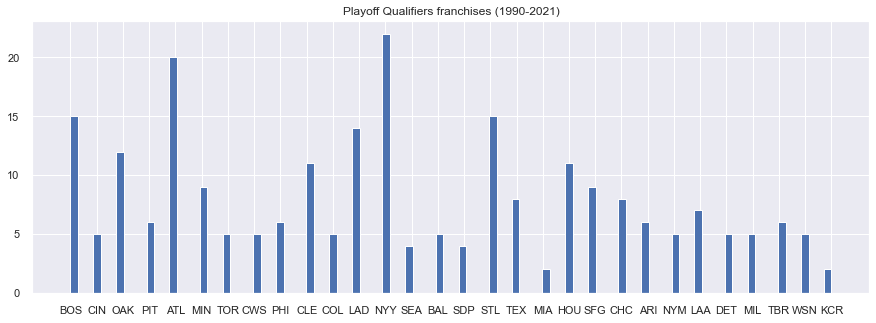

In [14]:
#Make a barplot to check who qualifed the playoff in 1990-2021
playoff_qual = df[df["make_playoffs_True"]==1]["franchID"]
plt.subplots(figsize=(15,5))
plt.hist(playoff_qual, bins=100)
plt.title("Playoff Qualifiers franchises (1990-2021)")

### Comparions of Statistics with Playoff Qualifiers and Non Qualifiers

Average WP for playoff teams: 0.5831074380165291
Average WP for non-playoff teams: 0.46834952978056393


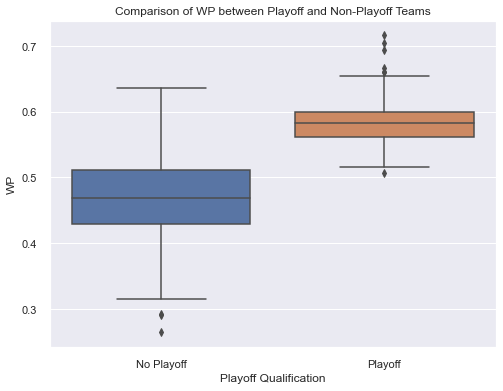

Average BA for playoff teams: 0.2652272727272729
Average BA for non-playoff teams: 0.25834012539184975


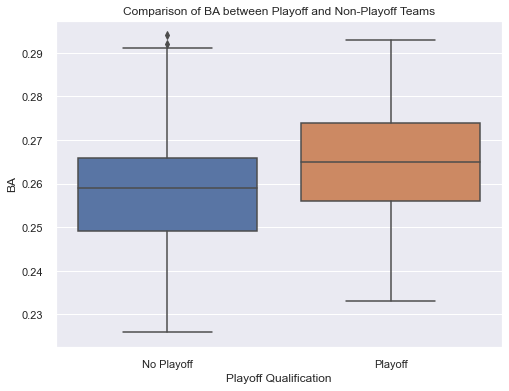

Average OBP for playoff teams: 0.3448925619834709
Average OBP for non-playoff teams: 0.3322836990595612


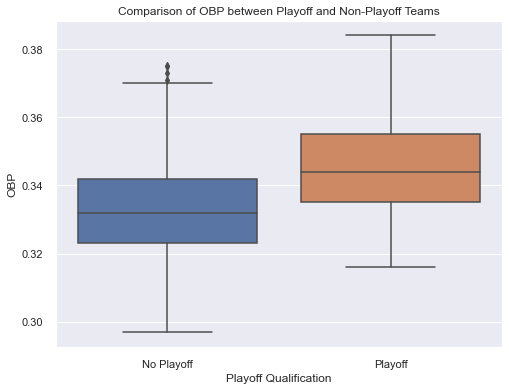

Average SLG for playoff teams: 0.4299504132231402
Average SLG for non-playoff teams: 0.4072711598746076


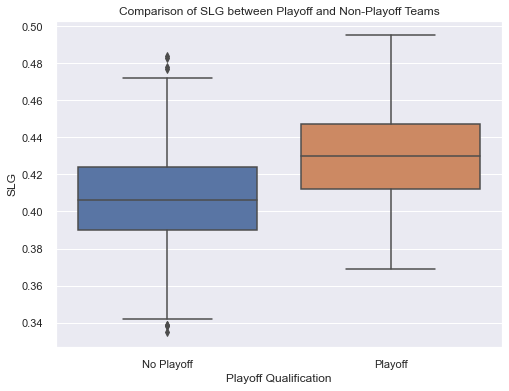

Average BB/HBP_ratio for playoff teams: 0.11323553719008268
Average BB/HBP_ratio for non-playoff teams: 0.10300156739811907


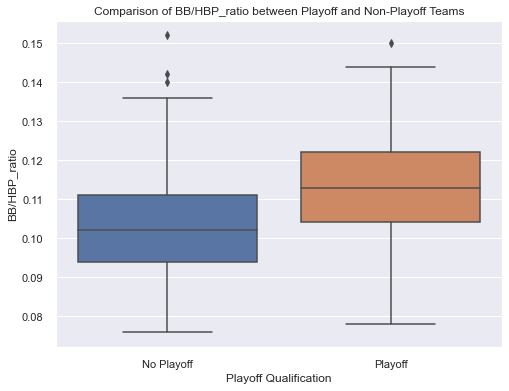

Average K/BB for playoff teams: 2.0110991735537196
Average K/BB for non-playoff teams: 2.2153072100313467


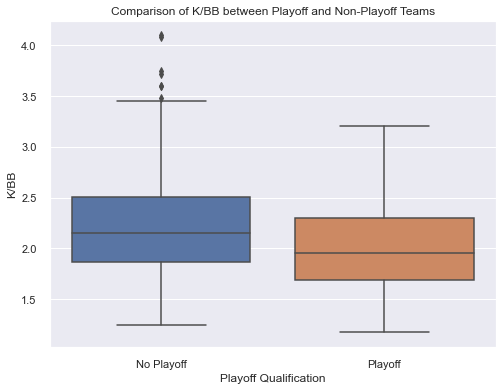

Average BAA for playoff teams: 0.4877148760330577
Average BAA for non-playoff teams: 0.5029639498432606


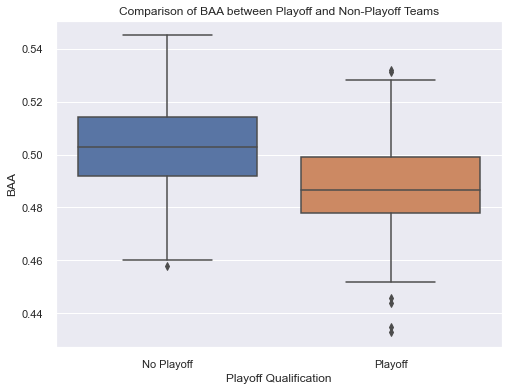

Average BABIP for playoff teams: 0.3000413223140494
Average BABIP for non-playoff teams: 0.2955031347962388


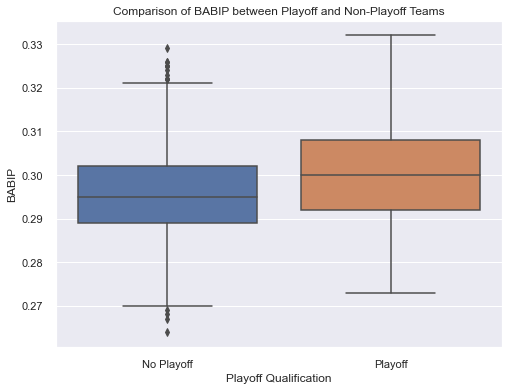

Average PSN for playoff teams: 122.8812479338843
Average PSN for non-playoff teams: 116.20618181818179


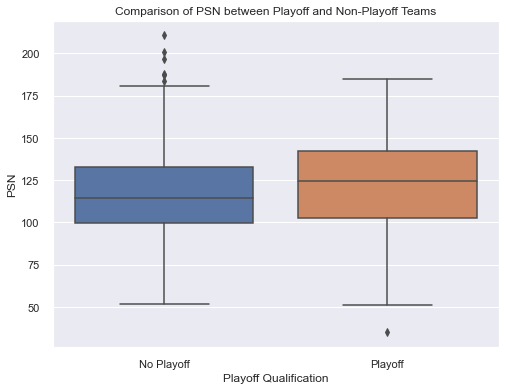

Average TA for playoff teams: 0.731396694214876
Average TA for non-playoff teams: 0.6808275862068964


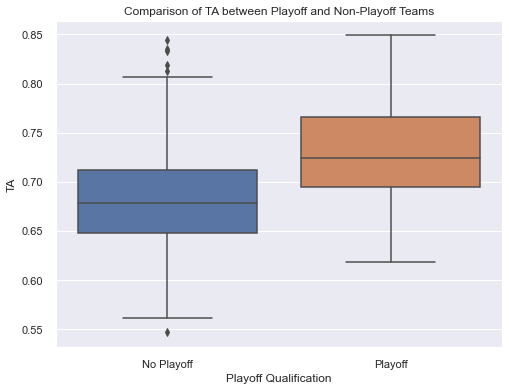

Average GPA for playoff teams: 0.26267768595041324
Average GPA for non-playoff teams: 0.25135736677116005


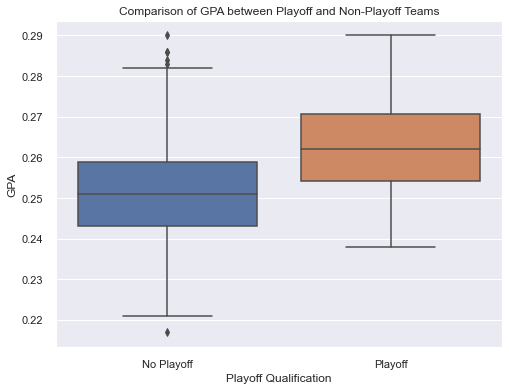

Average ERA for playoff teams: 3.876239669421487
Average ERA for non-playoff teams: 4.3962852664576815


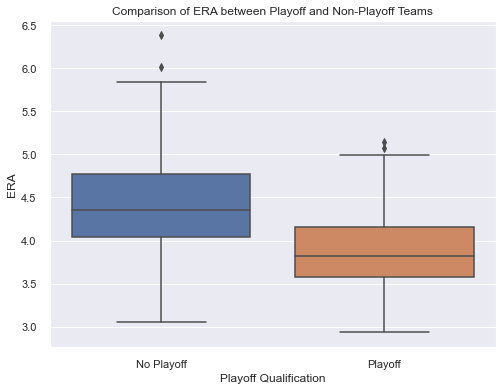

Average OPS for playoff teams: 0.7748429752066117
Average OPS for non-playoff teams: 0.7395548589341692


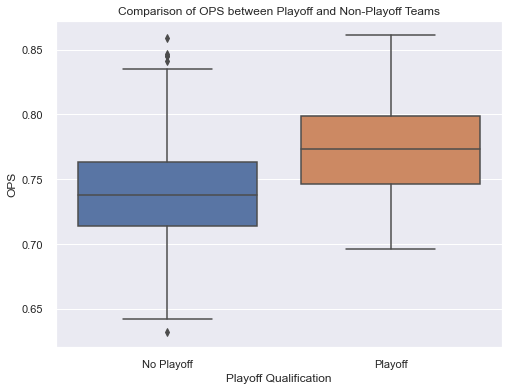

Average WHIP for playoff teams: 1.2971983471074373
Average WHIP for non-playoff teams: 1.3913150470219424


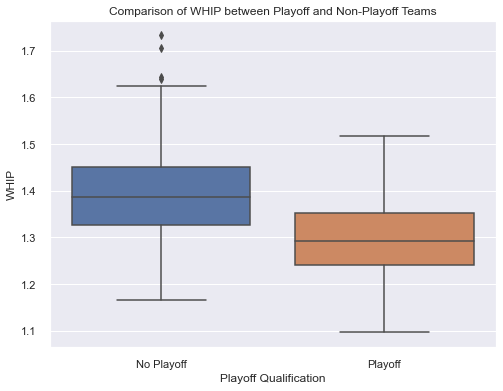

Average FP for playoff teams: 0.9838595041322318
Average FP for non-playoff teams: 0.982272727272729


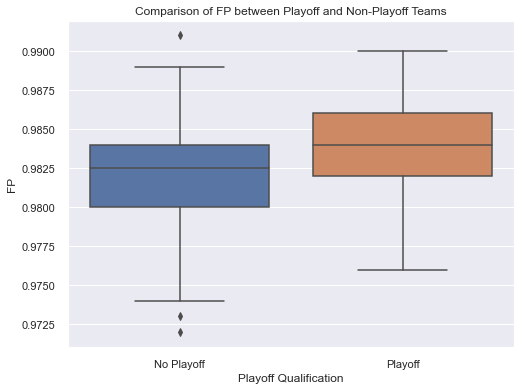

Average ISO for playoff teams: 0.16472314049586773
Average ISO for non-playoff teams: 0.14893103448275907


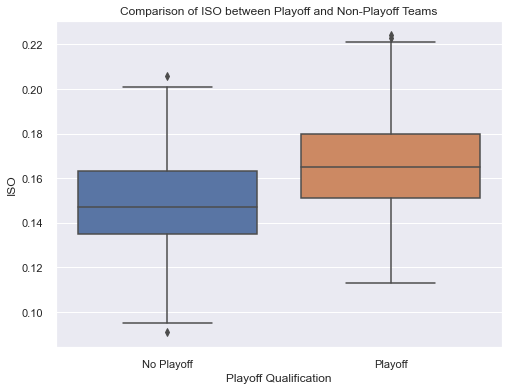

Average WP for playoff teams: 0.5831074380165291
Average WP for non-playoff teams: 0.46834952978056393


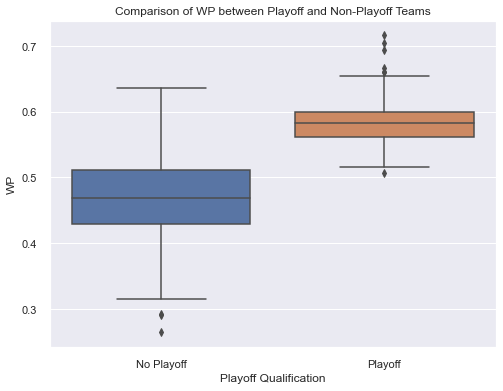

Average P% for playoff teams: 0.5793388429752067
Average P% for non-playoff teams: 0.4706112852664581


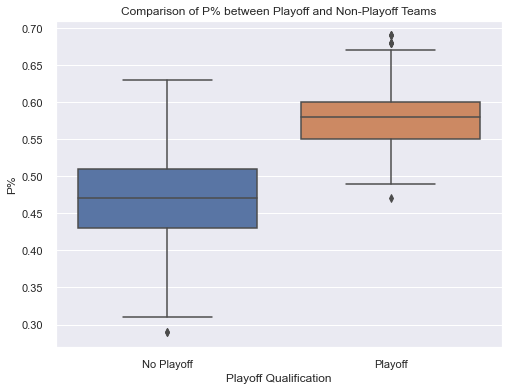

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of statistics to analyze
statistics = ['WP', 'BA', 'OBP', 'SLG','BB/HBP_ratio', 'K/BB', 'BAA', 'BABIP', 'PSN', 
              'TA', 'GPA', 'ERA', 'OPS', 'WHIP', 'FP', 'ISO', 'WP', 'P%']

# Iterate through each statistic
for stat in statistics:
    # Calculate the average for playoff teams
    average_playoff_teams = df[df["make_playoffs_True"] == 1][stat].mean()

    # Calculate the average for non-playoff teams
    average_non_playoff_teams = df[df["make_playoffs_True"] == 0][stat].mean()

    # Print the results
    print(f"Average {stat} for playoff teams: {average_playoff_teams}")
    print(f"Average {stat} for non-playoff teams: {average_non_playoff_teams}")

    # Create a boxplot for the current statistic
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="make_playoffs_True", y=stat, data=df)
    plt.xticks([0, 1], ["No Playoff", "Playoff"])
    plt.xlabel("Playoff Qualification")
    plt.ylabel(stat)
    plt.title(f"Comparison of {stat} between Playoff and Non-Playoff Teams")
    plt.show()


### Correlation Map

<AxesSubplot:title={'center':'Correlation Matrix of Baseball data'}>

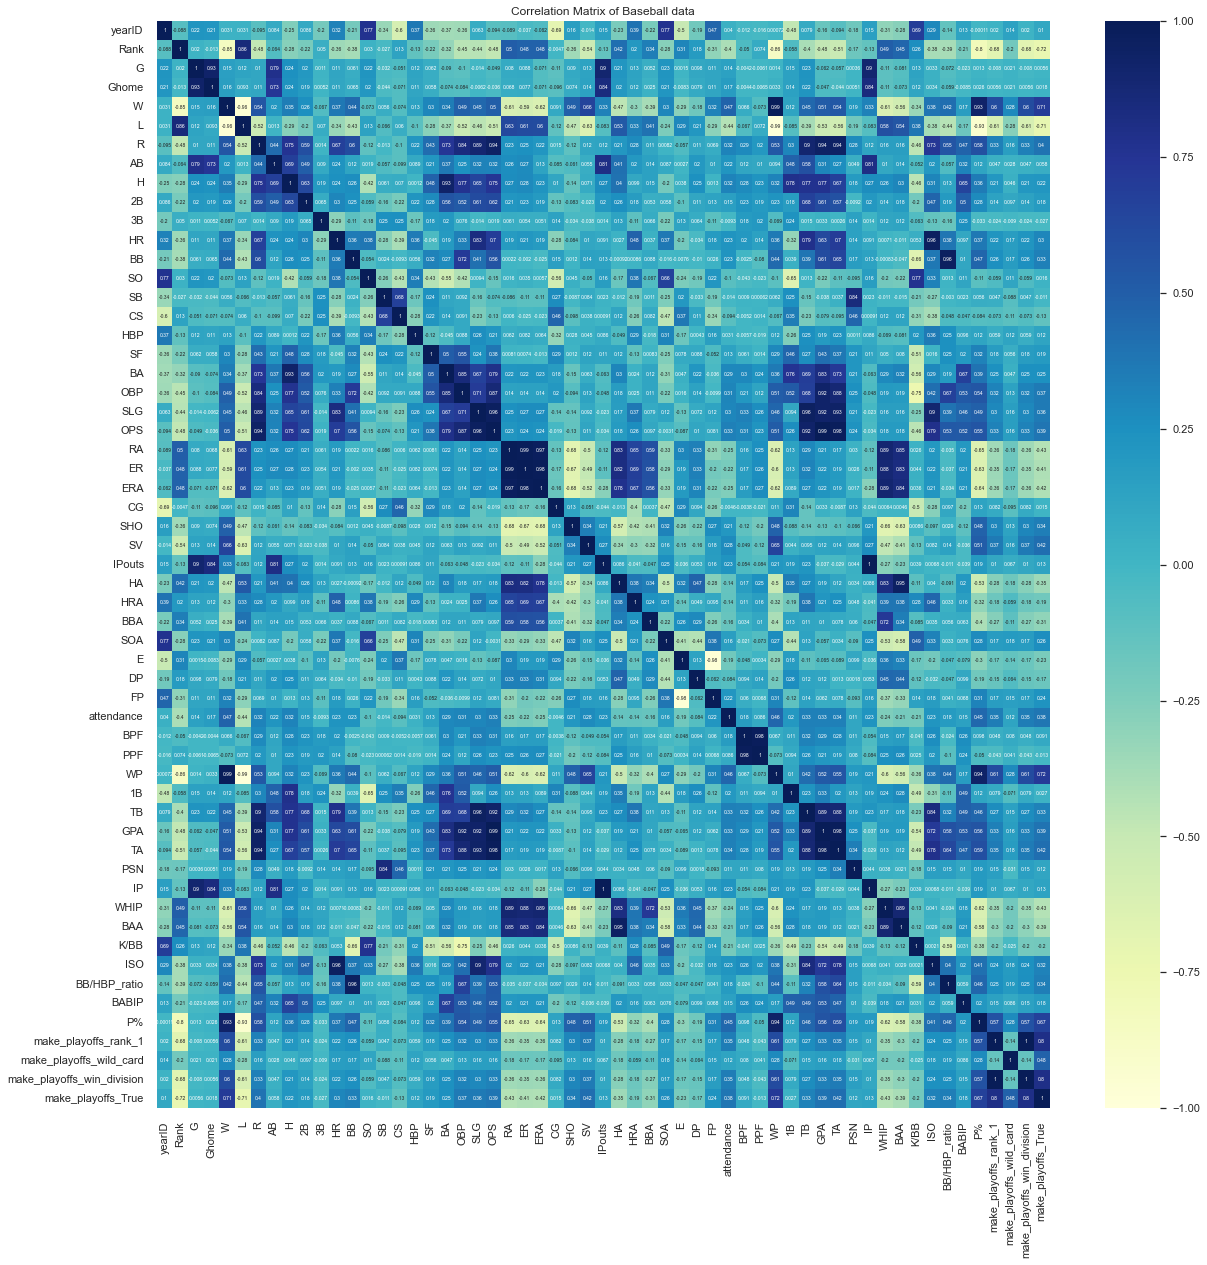

In [16]:
#make a Correlation map of all the columns in the data set
plt.subplots(figsize=(20,20))
plt.title("Correlation Matrix of Baseball data")
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws = {'size':5}, cmap = "YlGnBu")

In [17]:
df.shape[1]

70

#### Divide it into 2 correlation map to improve "READABILITY"

In [18]:
df1 = df.iloc[:, :37]
df2 = df.iloc[:, 37:]

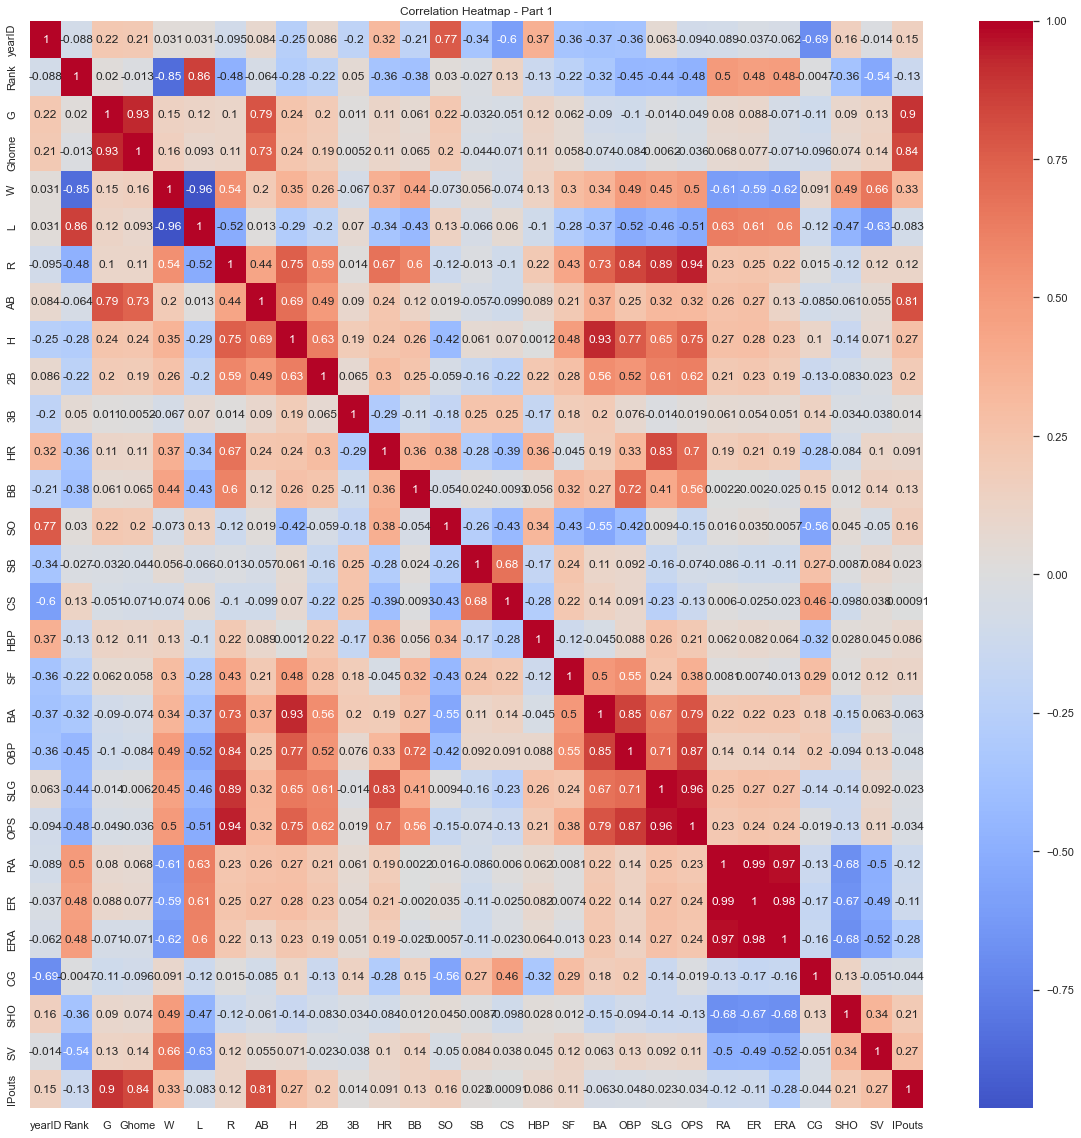

In [19]:
plt.figure(figsize=(20, 20))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Part 1')
plt.show()

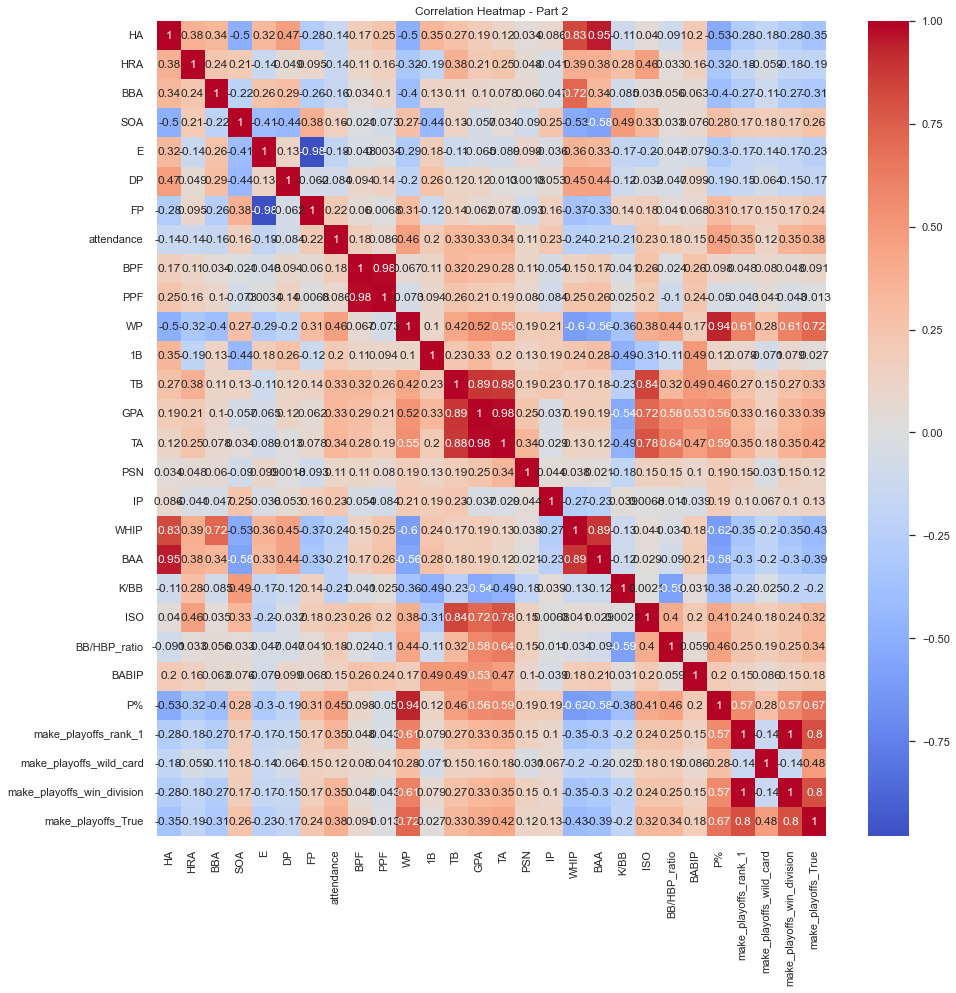

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Part 2')
plt.show()

### Team Bating statistics

<Figure size 864x360 with 0 Axes>

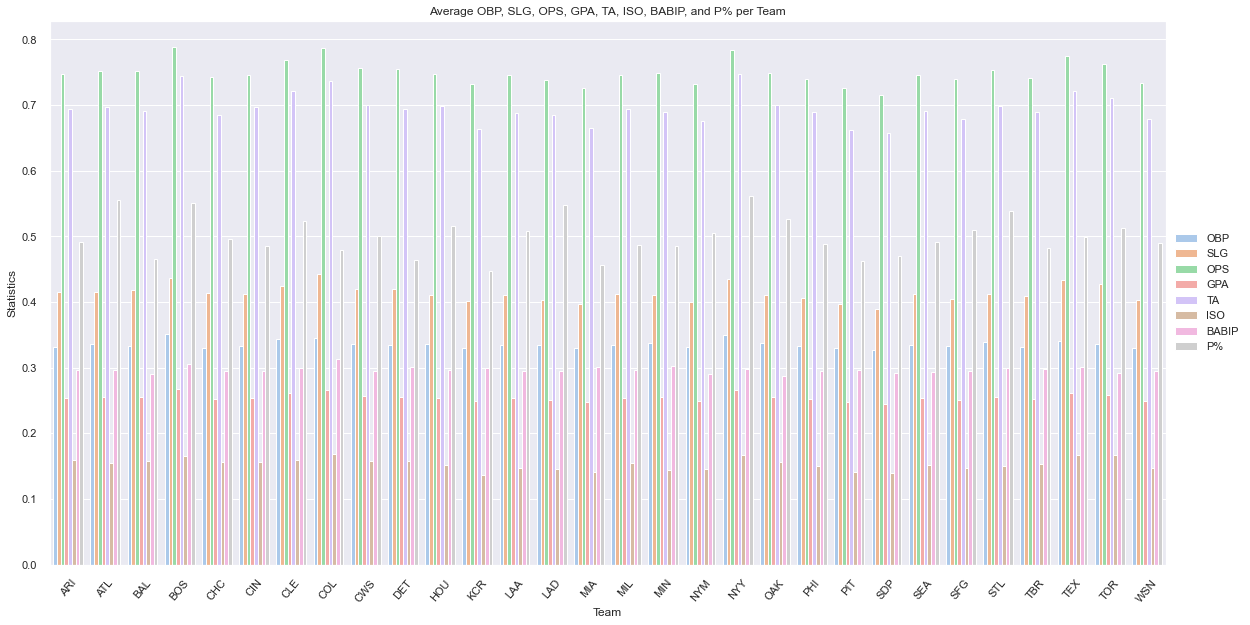

In [21]:
#Make the plot to see OBP, SLG, OPS, GPA, TA, ISO, BABIP, and P% per Each Team
plt.figure(figsize=(12,5))

# Calculate the average of each metric for each team and year
team_batting_statistics = df.groupby(['franchID'])[['OBP', 'SLG', 'OPS','GPA','TA','ISO','BABIP','P%']].mean()

# Separate playoff qualifiers and non-qualifiers for each year
playoff_qualifiers = df[df['make_playoffs_True'] == 1].groupby(['franchID']).mean()
non_qualifiers = df[df['make_playoffs_True'] == 0].groupby(['franchID']).mean()

# Make the chart look pretty
plt.figure(figsize=(20, 10))

# Melt the DataFrame to reformat it for barplot
team_statistic_melted1 = team_batting_statistics.reset_index().melt(id_vars='franchID', var_name='Statistic', value_name='Value')

# Draw the barplot
ax = sns.barplot(data=team_statistic_melted1, x='franchID', y='Value', hue='Statistic', palette="pastel")
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Average OBP, SLG, OPS, GPA, TA, ISO, BABIP, and P% per Team")
plt.xlabel("Team")
plt.ylabel("Statistics")
plt.show()


### Team Pitching statistics

<Figure size 864x360 with 0 Axes>

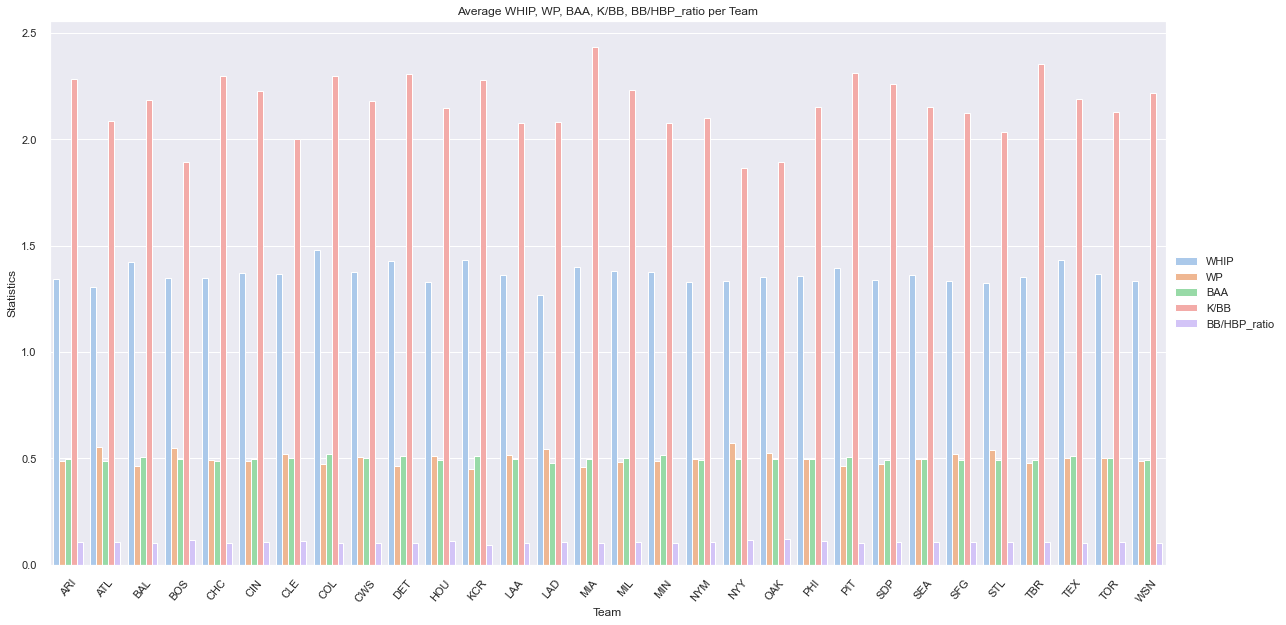

In [22]:
#Make the plot to see WHIP, WP, BAA, K/BB, BB/HBP_ratio per Each Team
plt.figure(figsize=(12,5))

# Calculate the average of each metric for each team and year
team_pitching_statistics = df.groupby(['franchID'])[['WHIP','WP','BAA','K/BB','BB/HBP_ratio']].mean()

# Separate playoff qualifiers and non-qualifiers for each year
playoff_qualifiers = df[df['make_playoffs_True'] == 1].groupby(['franchID']).mean()
non_qualifiers = df[df['make_playoffs_True'] == 0].groupby(['franchID']).mean()

# Make the chart look pretty
plt.figure(figsize=(20, 10))

# Melt the DataFrame to reformat it for barplot
team_statistic_melted2 = team_pitching_statistics.reset_index().melt(id_vars='franchID', var_name='Statistic', value_name='Value')

# Draw the barplot
ax = sns.barplot(data=team_statistic_melted2, x='franchID', y='Value', hue='Statistic', palette="pastel")
plt.xticks(rotation=50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Average WHIP, WP, BAA, K/BB, BB/HBP_ratio per Team")
plt.xlabel("Team")
plt.ylabel("Statistics")
plt.show()

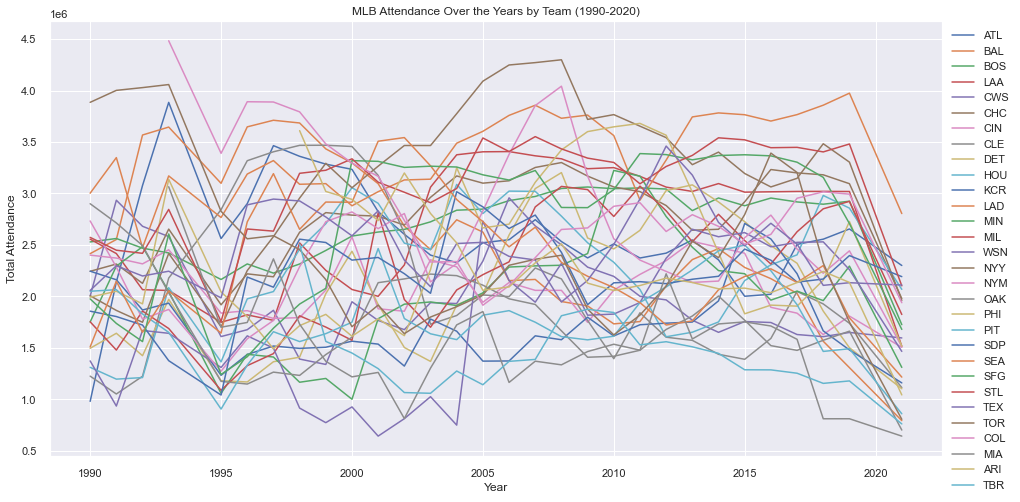

In [23]:
#MLB Attendance Over the Years by Team (1990-2020) 
team_franchises = df['franchID'].unique()


plt.figure(figsize=(16, 8))

for team_franchise in team_franchises:
    
    team_attendance = df[df['franchID'] == team_franchise].groupby('yearID')['attendance'].sum()
    
    #Time-series graph visualization
    plt.plot(team_attendance.index, team_attendance.values, label=team_franchise)

plt.title('MLB Attendance Over the Years by Team (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


### Time-Series Trend
#### NYY, TEX, LAD

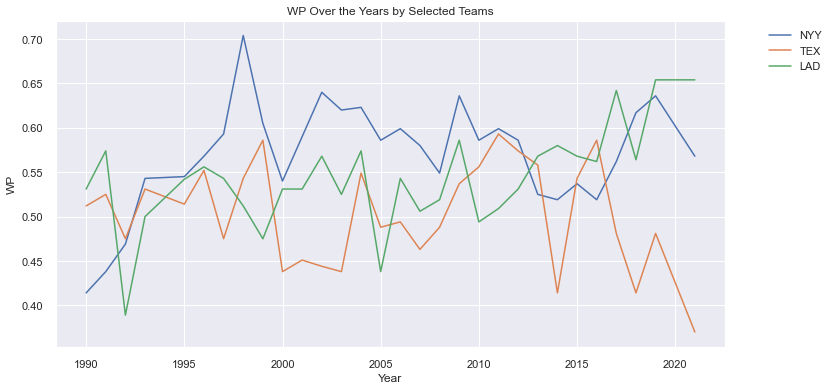

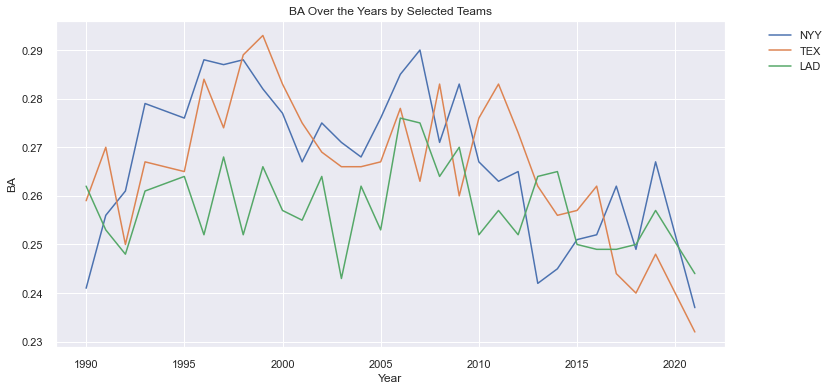

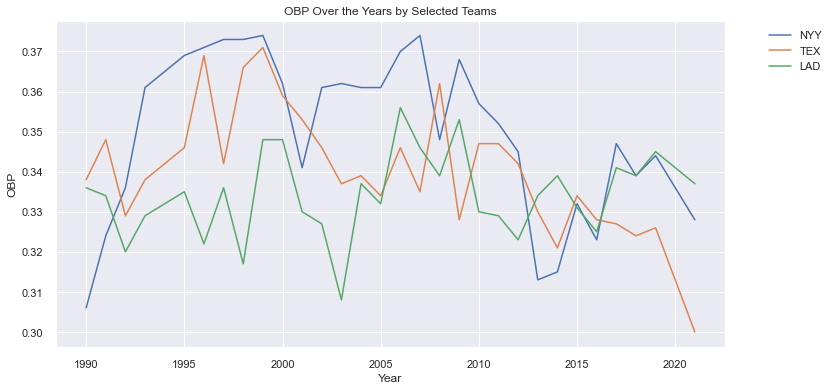

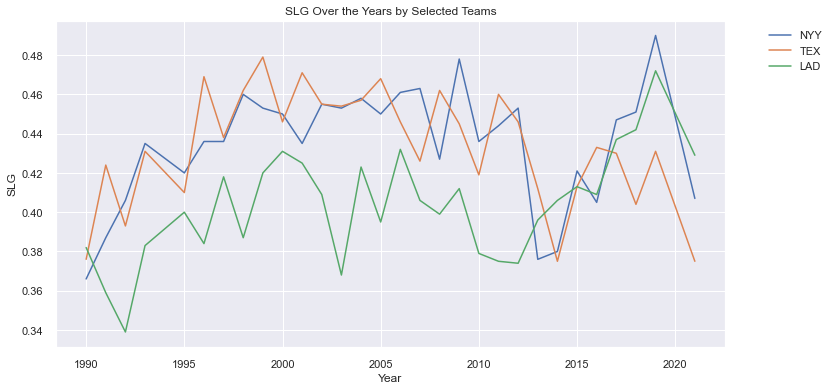

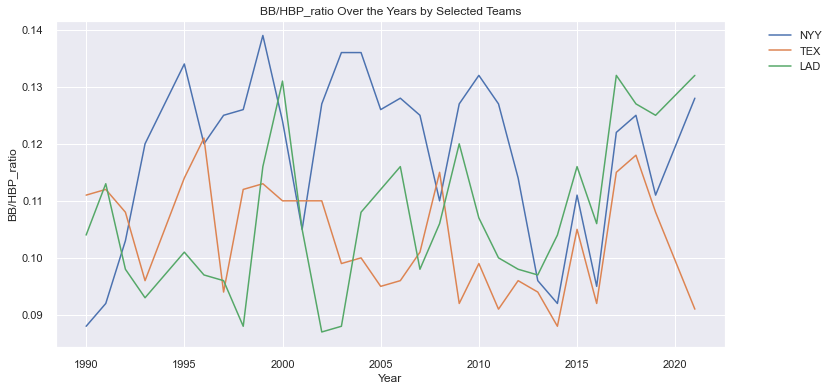

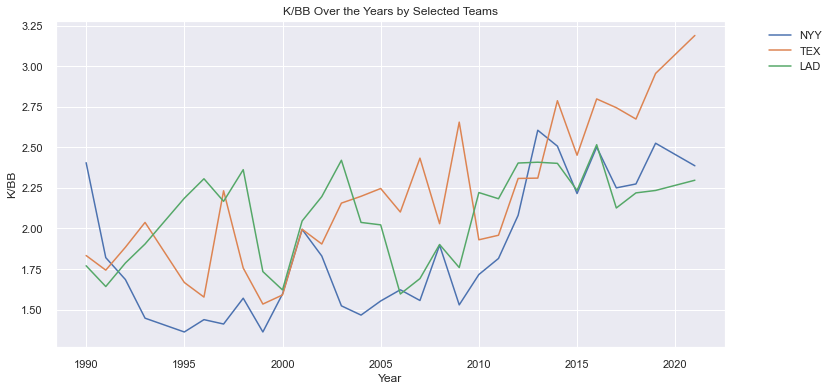

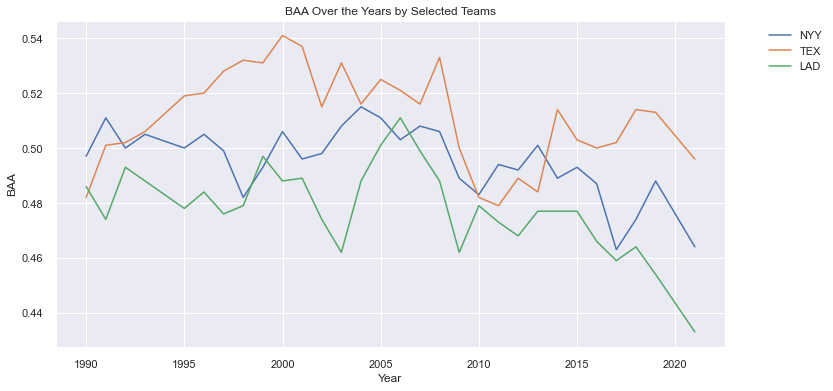

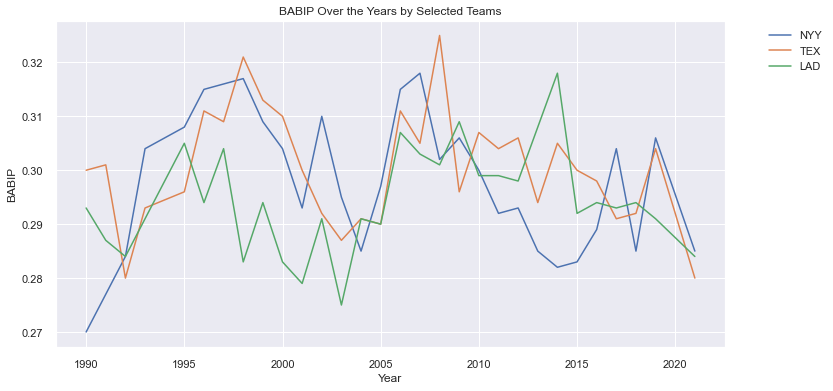

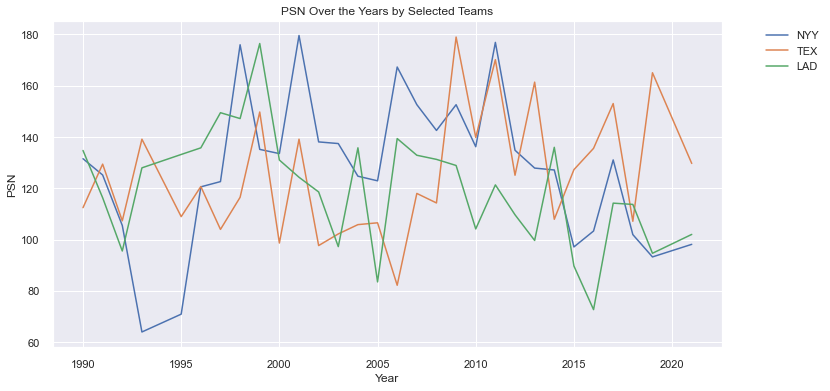

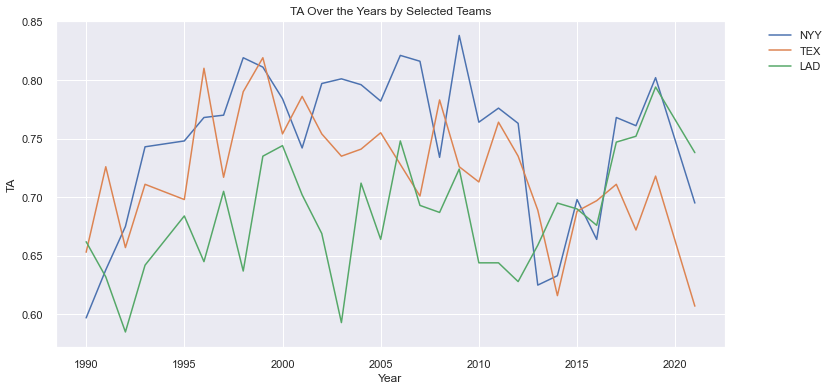

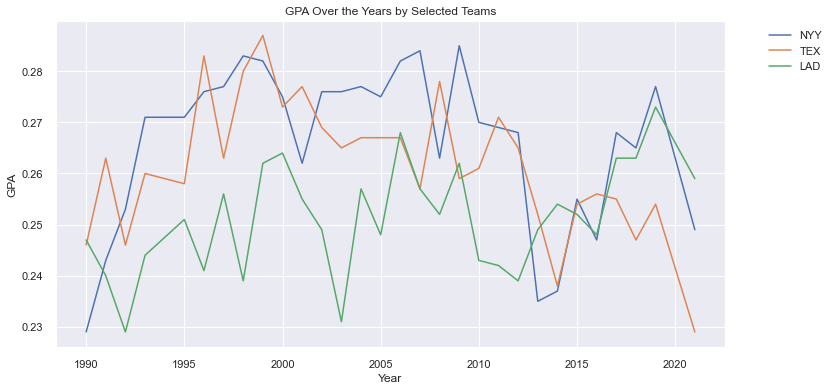

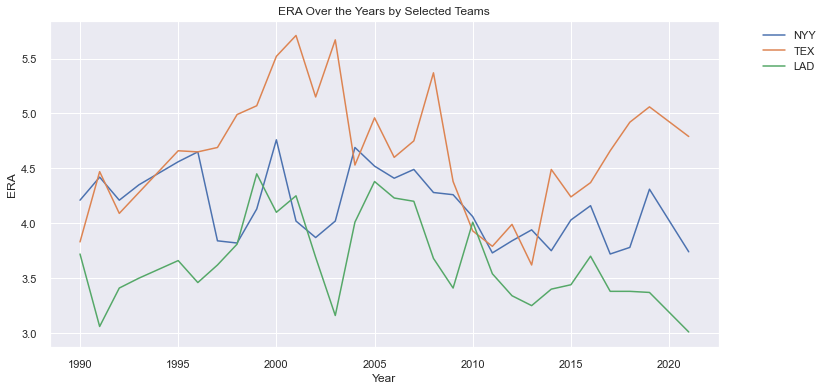

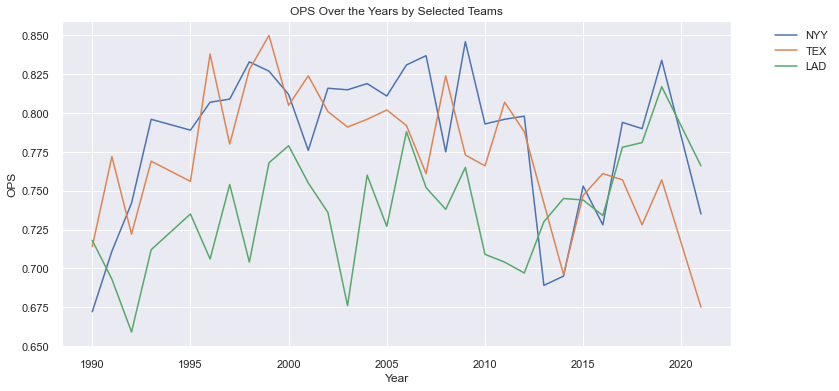

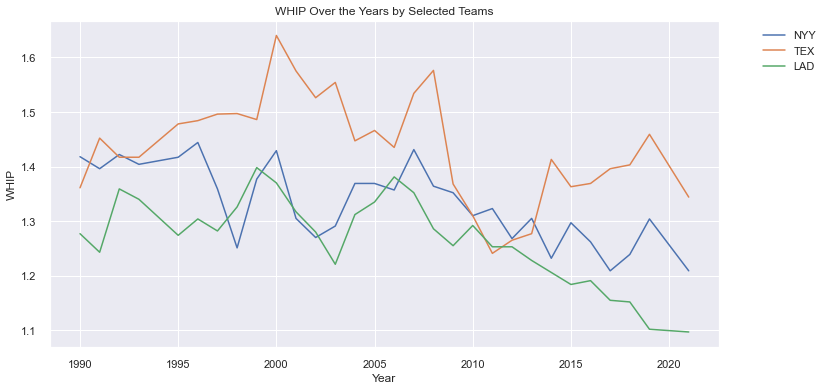

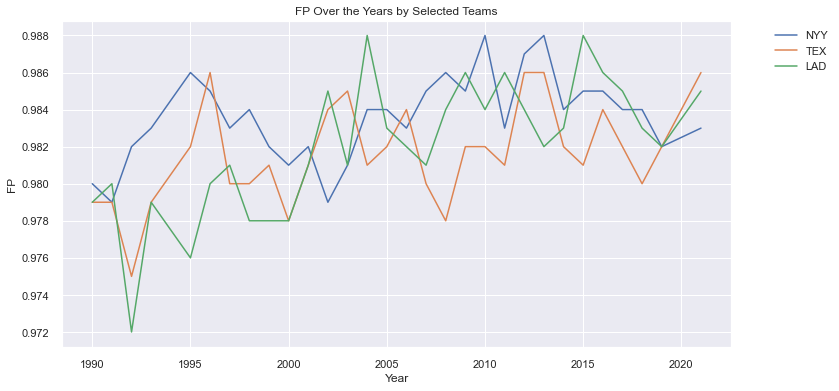

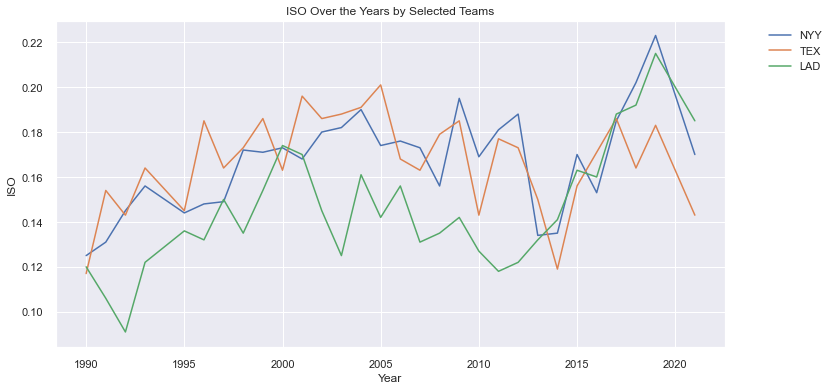

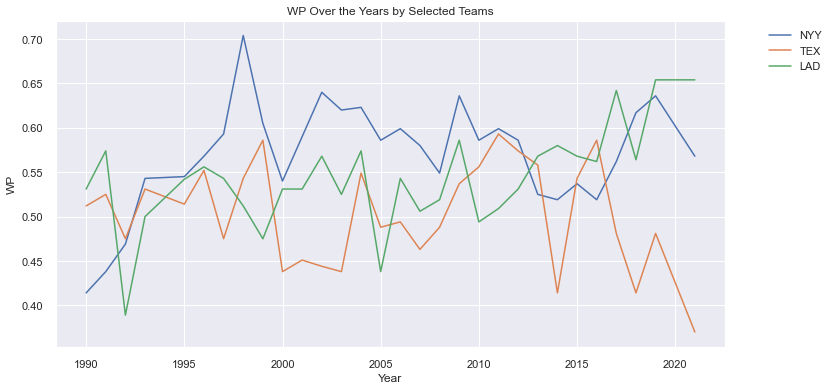

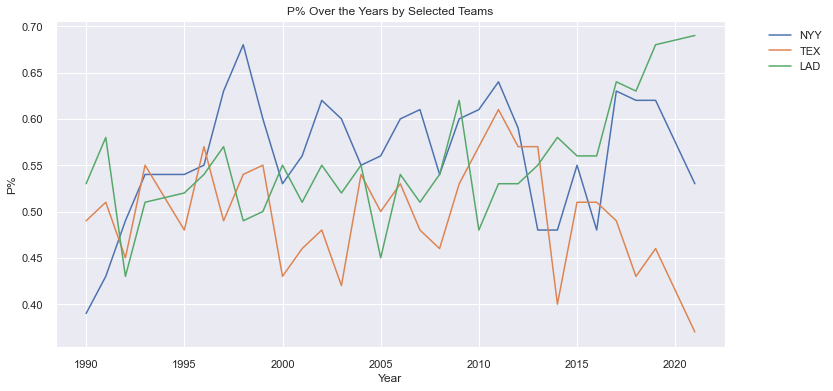

In [24]:
# List of statistics to analyze
statistics = ['WP', 'BA', 'OBP', 'SLG', 'BB/HBP_ratio', 'K/BB', 'BAA', 'BABIP', 'PSN',
              'TA', 'GPA', 'ERA', 'OPS', 'WHIP', 'FP', 'ISO', 'WP', 'P%']

selected_teams = ['NYY', 'TEX', 'LAD']
# Iterate through each statistic
for stat in statistics:
    # Create a separate plot for each team
    plt.figure(figsize=(12, 6))
    
    # Iterate through each team
    for team_franchise in selected_teams:
        # Filter data for the current team
        team_data = df[df['franchID'] == team_franchise]

        # Plot the data for the current team
        plt.plot(team_data['yearID'], team_data[stat], label=team_franchise)

    plt.xlabel('Year')
    plt.ylabel(stat)
    plt.title(f'{stat} Over the Years by Selected Teams')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


### Data Pre_Processing For Model Built Out

In [25]:
#Removing unnecessary columns to do modeling.
columns_to_drop = ["yearID","G","lgID","franchID","divID","Ghome","W","L","AB","H","1B","2B","3B","BB",
                   "SB","CG","SHO","SV","IPouts","R","RA","ER","teamID","name","park",
                   "attendance","DivWin","WCWin","LgWin","WSWin","teamIDBR","teamIDlahman45","teamIDretro","make_playoffs_rank_1","make_playoffs_wild_card","make_playoffs_win_division",
                  "PPF","BPF","HA","HRA","BBA","SO","SOA","E","CS","SF","DP","BA","Rank","HR","HBP","TB","IP"]
ndf = df.drop(columns =columns_to_drop, inplace = False)

print(ndf)

       OBP    SLG    OPS   ERA     FP     WP    GPA     TA      PSN   WHIP  \
0    0.316  0.396  0.712  4.58  0.974  0.401  0.241  0.642  117.354  1.473   
1    0.336  0.370  0.706  4.04  0.985  0.472  0.244  0.653  109.805  1.381   
2    0.351  0.395  0.746  3.72  0.980  0.543  0.257  0.677   70.667  1.358   
3    0.336  0.391  0.727  3.79  0.978  0.494  0.249  0.653   93.917  1.393   
4    0.328  0.379  0.707  3.61  0.980  0.580  0.242  0.634  120.650  1.284   
5    0.322  0.392  0.714  4.34  0.980  0.475  0.243  0.645  143.108  1.443   
6    0.332  0.399  0.731  3.39  0.983  0.562  0.249  0.677  142.612  1.292   
7    0.334  0.391  0.725  4.26  0.981  0.475  0.248  0.649  108.479  1.408   
8    0.344  0.409  0.753  4.39  0.979  0.488  0.257  0.696  111.055  1.442   
9    0.320  0.345  0.665  3.61  0.978  0.463  0.230  0.609  123.267  1.305   
10   0.337  0.395  0.732  3.93  0.980  0.466  0.250  0.660  103.382  1.414   
11   0.336  0.382  0.718  3.72  0.979  0.531  0.247  0.662  134.

<AxesSubplot:title={'center':'Correlation Matrix of Baseball data'}>

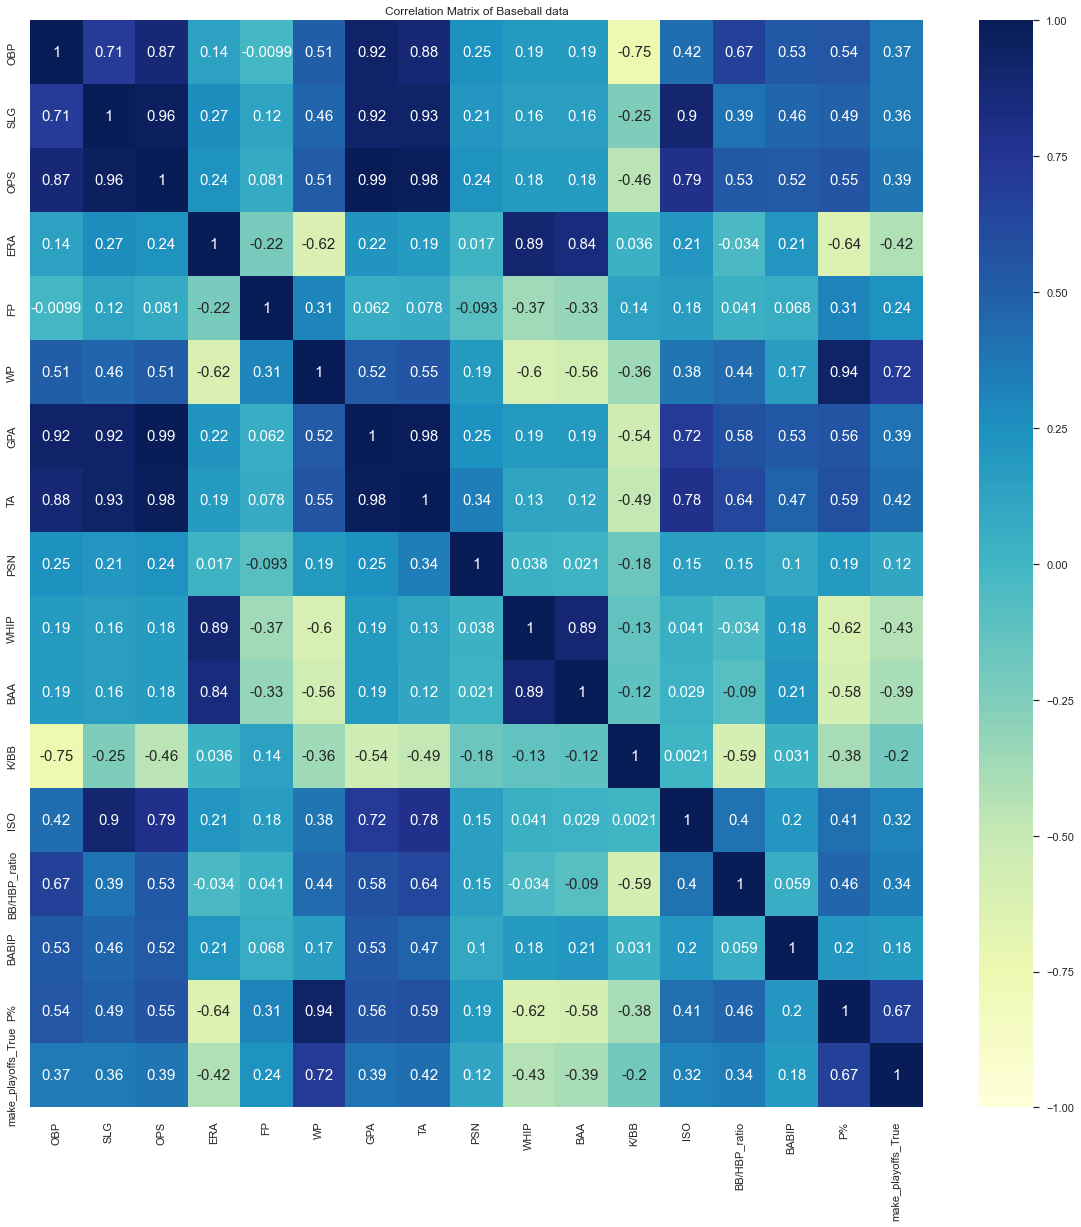

In [26]:
#make a heatmap of the important columns to predict the playoff in the data set // 21 columns - 7 
plt.subplots(figsize=(20,20))
plt.title("Correlation Matrix of Baseball data")
sns.heatmap(ndf.corr(), vmin=-1, vmax=1, annot=True, annot_kws = {'size':15}, cmap = "YlGnBu")

#### Check the distribution of selected features by histograms
#### Pitching columns: ['BB/HBP_ratio','K/BB','BAA','ERA','WHIP'  ]
#### Batting columns: ['BABIP','PSN','TA', 'GPA','OPS','ISO'  ]
#### Team ['FP','WP', 'P%']

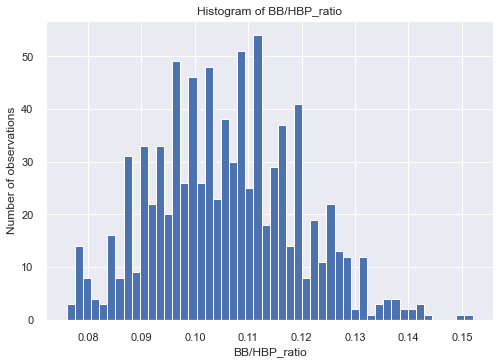

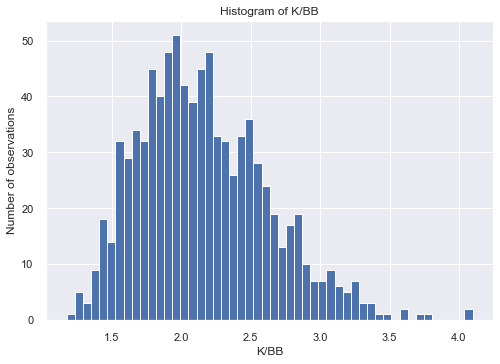

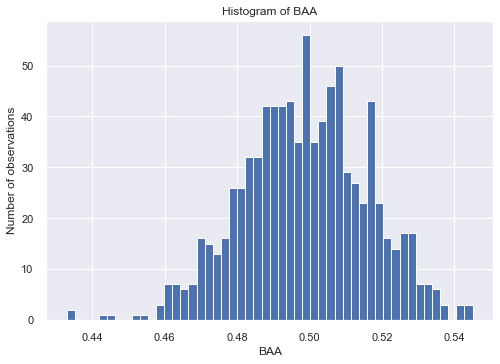

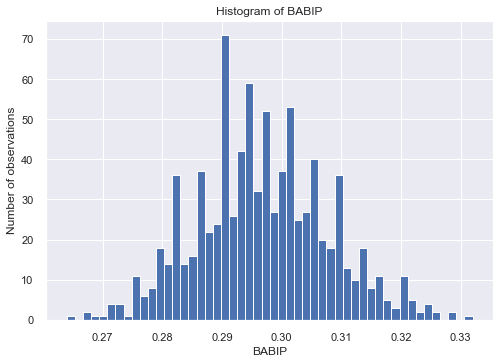

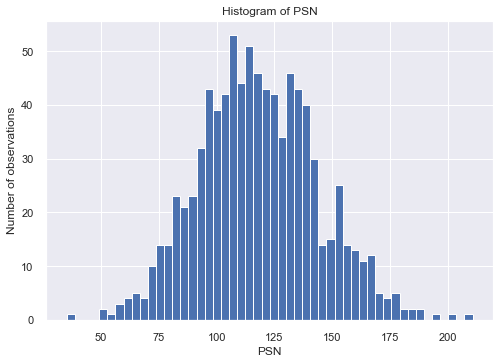

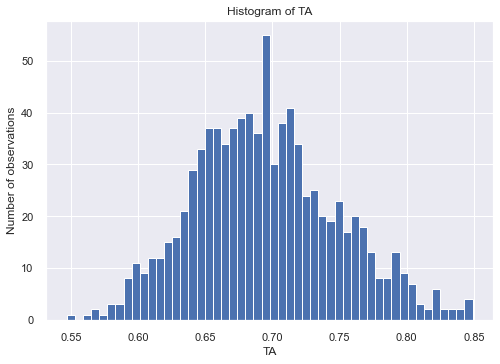

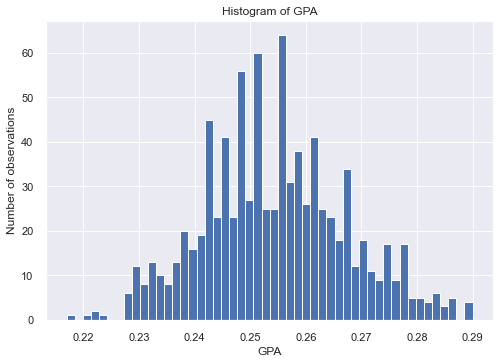

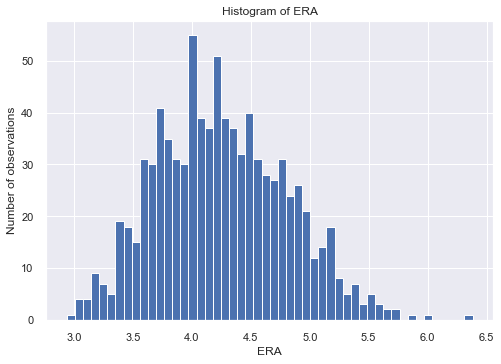

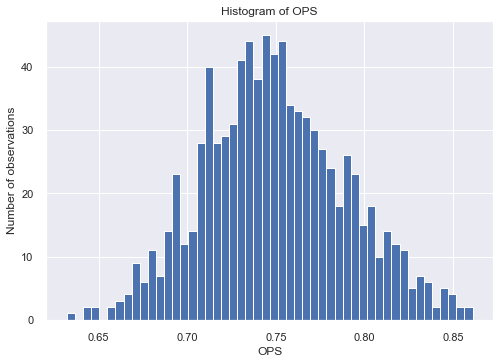

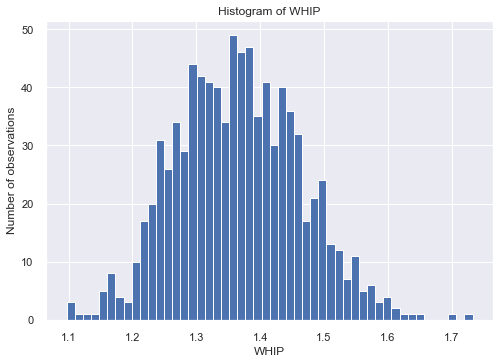

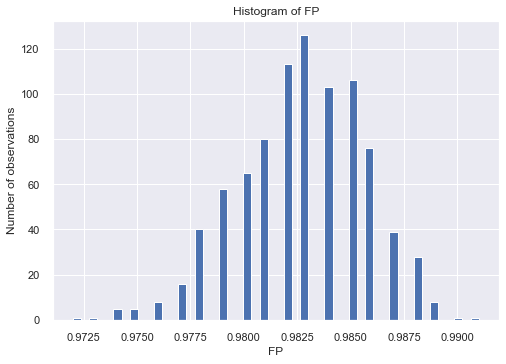

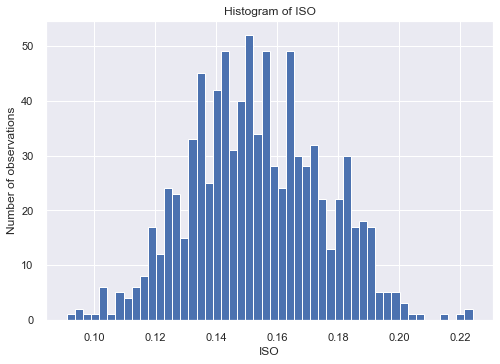

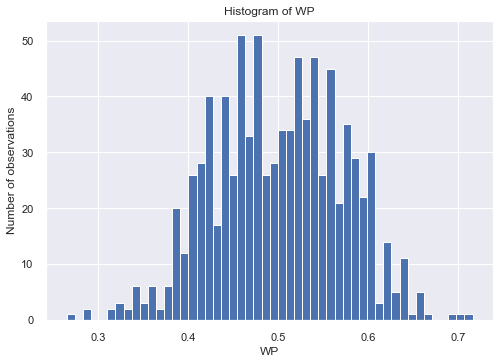

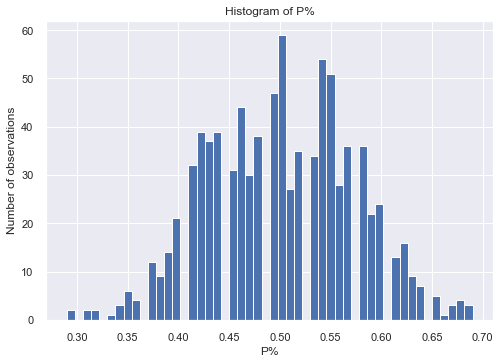

In [27]:
for col in ['BB/HBP_ratio', 'K/BB', 'BAA', 'BABIP', 'PSN', 'TA', 'GPA', 'ERA', 'OPS', 'WHIP', 'FP', 'ISO', 'WP', 'P%']:
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Number of observations')
    plt.title(str("Histogram of " + col))
    plt.show()

## 4.Machine Learning Algorithms

#### a. Logistic Regression
#### b. GradientBoostingClassifier
#### c. K-Nearest Neighbors, KNN
#### d. Decision Tree
#### e. Random Forest Classifier
#### f. XGBoost
#### g. Support Vector Machine

### 4-a. Logistic Regression

In [28]:
# Separate features (X) and target variable (y)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#features = 14 cols
features = ['BB/HBP_ratio','K/BB','BAA','BABIP','PSN','TA','GPA','ERA','OPS', 'WHIP', 
            'FP', "ISO","WP","P%"]

X = ndf[features]
y = ndf["make_playoffs_True"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_rep_lr)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8636363636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       193
           1       0.82      0.63      0.71        71

    accuracy                           0.86       264
   macro avg       0.85      0.79      0.81       264
weighted avg       0.86      0.86      0.86       264

Confusion Matrix:
[[183  10]
 [ 26  45]]


C:\Users\hyung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Figure out meaningful features.
from sklearn.feature_selection import RFE
lrrfe = LogisticRegression()

rfe = RFE(lrrfe, n_features_to_select=10)
fit = rfe.fit(X_train, y_train)

selected_features = fit.support_
print("Selected Features:", selected_features)

Selected Features: [ True  True False False False  True  True  True  True  True False  True
  True  True]


C:\Users\hyung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 4-b. GradientBoostingClassifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

# Evaluate the model's performance
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
classification_rep_gbc = classification_report(y_test, y_pred_gbc)
conf_matrix = confusion_matrix(y_test, y_pred_gbc)

# Figure out meaningful features.
print("Importance:", gbc.feature_importances_)

print("Accuracy:", accuracy_gbc)
print("Classification Report:")
print(classification_rep_gbc)
print("Confusion Matrix:")
print(conf_matrix)

Importance: [2.14083625e-02 2.56481633e-02 1.13517250e-02 7.40140922e-03
 1.65708223e-02 1.14116126e-02 5.78125049e-04 1.49252958e-02
 1.11917479e-02 2.06175793e-02 5.94659232e-03 9.71361641e-03
 8.27169875e-01 1.60650730e-02]
Accuracy: 0.9242424242424242
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       193
           1       0.86      0.86      0.86        71

    accuracy                           0.92       264
   macro avg       0.90      0.90      0.90       264
weighted avg       0.92      0.92      0.92       264

Confusion Matrix:
[[183  10]
 [ 10  61]]


### 4-c. K-Nearest Neighbors, KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Classification Report:")
print(classification_rep_knn)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       193
           1       0.78      0.75      0.76        71

    accuracy                           0.88       264
   macro avg       0.84      0.83      0.84       264
weighted avg       0.87      0.88      0.87       264

Confusion Matrix:
[[178  15]
 [ 18  53]]


In [32]:
param_grid = {'n_neighbors': range(1,10)}

grid_search = GridSearchCV(knn, param_grid, cv =5)
grid_search.fit(X_train_scaled, y_train)

print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)

Best k: 9
Best Accuracy: 0.8895882507212169


### 4-d. Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree classifier model
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print("Accuracy:", accuracy_dt)
print("Classification Report:")
print(classification_rep_dt)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9128787878787878
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       193
           1       0.83      0.85      0.84        71

    accuracy                           0.91       264
   macro avg       0.89      0.89      0.89       264
weighted avg       0.91      0.91      0.91       264

Confusion Matrix:
[[181  12]
 [ 11  60]]


### 4-e. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier model
rfc = RandomForestClassifier()

# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfc = rfc.predict(X_test)

# Evaluate the model's performance
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

print("Importance:", rfc.feature_importances_)
print("Accuracy:", accuracy_rfc)
print("Classification Report:")
print(classification_rep_rfc)
print("Confusion Matrix:")
print(conf_matrix)

Importance: [0.03570399 0.02401991 0.0391901  0.02330997 0.02633035 0.04776238
 0.0410875  0.08633306 0.05453349 0.05972993 0.01742951 0.02939697
 0.34927676 0.16589607]
Accuracy: 0.9128787878787878
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       193
           1       0.85      0.82      0.83        71

    accuracy                           0.91       264
   macro avg       0.89      0.88      0.89       264
weighted avg       0.91      0.91      0.91       264

Confusion Matrix:
[[183  10]
 [ 13  58]]


### 4-f. XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

print("Accuracy:", accuracy_xgb)
print("Classification Report:")
print(classification_rep_xgb)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9318181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       193
           1       0.88      0.86      0.87        71

    accuracy                           0.93       264
   macro avg       0.92      0.91      0.91       264
weighted avg       0.93      0.93      0.93       264

Confusion Matrix:
[[185   8]
 [ 10  61]]


### 4-g. Support Vector Machine

In [36]:
from sklearn.svm import SVC
# Create the SVM classifier model
svc = SVC()

# We used the Standard scaling to make the performance better.
#scaled = StandardScaler()
#X_train_scaled = scaled.fit_transform(X_train)
#X_test_scaled = scaled.transform(X_test)    >> we already put the codes on the K-NN algorithm. 


# Fit the model on the training data
svc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_test_scaled)

# Evaluate the model's performance
accuracy_svc = accuracy_score(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)

print("Accuracy:", accuracy_svc)
print("Classification Report:")
print(classification_rep_svc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       193
           1       0.87      0.82      0.84        71

    accuracy                           0.92       264
   macro avg       0.90      0.89      0.89       264
weighted avg       0.92      0.92      0.92       264

Confusion Matrix:
[[184   9]
 [ 13  58]]


## Model Comaprison

In [37]:
models = {"LR": [accuracy_lr],
         "GBC": [accuracy_gbc],
         "KNN": [accuracy_knn],
         "DT":[accuracy_dt],
         "RFC":[accuracy_rfc],
         "XGB":[accuracy_xgb],
         "SVC":[accuracy_svc]}

# Create a DataFrame from the models dictionary
results_df = pd.DataFrame.from_dict(models, orient='index', columns=['Accuracy'])
results_df

Accuracy
LR   0.863636
GBC  0.924242
KNN  0.875000
DT   0.912879
RFC  0.912879
XGB  0.931818
SVC  0.916667

## Predict playoff qualifiers by "Logistic Regression" for a given year (1990-2021), except for 1994,  2020 season.

In [38]:
import warnings
warnings.filterwarnings("ignore")

# predict playoff qualifiers for a given year (1990-2021), except for 1994, 2020 season.
for year in range(1990, 2022):
    if year != 1994 and year != 2020:
        _df = df[df["yearID"] == year].copy()
        X_year = _df[features]

        # Predict using the trained Logistic Regression model
        predicted_playoff_qualifiers_lr = lr.predict(X_year)

        # Add the predicted_playoff_qualifier column to the copied DataFrame
        _df["predicted_playoff_qualifier_lr"] = predicted_playoff_qualifiers_lr

        print("--------")
        print(year)
        print("--------")
        print("Actual playoff qualifiers in " + str(year) + ":")
        actual = set(_df[_df["make_playoffs_True"] == 1]["franchID"])
        print(actual)
        print("Predicted playoff qualifiers using Logistic Regression in " + str(year) + ":")
        predicted_lr = set(_df[_df["predicted_playoff_qualifier_lr"] == 1]["franchID"])
        print(predicted_lr)
        print()
        incorrect_lr = predicted_lr.difference(actual)
        print("Incorrect predictions using Logistic Regression (false positives) " + str(len(incorrect_lr)) + ":")
        print(incorrect_lr)
        exclusions_lr = actual.difference(predicted_lr)
        print("Incorrect exclusions from prediction using Logistic Regression (false negatives) " + str(len(exclusions_lr)) + ":")
        print(exclusions_lr)
        print()
        print()

--------
1990
--------
Actual playoff qualifiers in 1990:
{'BOS', 'OAK', 'PIT', 'CIN'}
Predicted playoff qualifiers using Logistic Regression in 1990:
{'WSN', 'PIT', 'CWS', 'BOS', 'OAK', 'TOR', 'CIN', 'NYM'}

Incorrect predictions using Logistic Regression (false positives) 4:
{'NYM', 'TOR', 'CWS', 'WSN'}
Incorrect exclusions from prediction using Logistic Regression (false negatives) 0:
set()


--------
1991
--------
Actual playoff qualifiers in 1991:
{'MIN', 'TOR', 'ATL', 'PIT'}
Predicted playoff qualifiers using Logistic Regression in 1991:
{'ATL', 'LAD', 'MIN', 'PIT', 'CWS', 'TOR'}

Incorrect predictions using Logistic Regression (false positives) 2:
{'CWS', 'LAD'}
Incorrect exclusions from prediction using Logistic Regression (false negatives) 0:
set()


--------
1992
--------
Actual playoff qualifiers in 1992:
{'PIT', 'TOR', 'OAK', 'ATL'}
Predicted playoff qualifiers using Logistic Regression in 1992:
{'ATL', 'WSN', 'MIN', 'PIT', 'CWS', 'OAK', 'BAL', 'TOR', 'CIN', 'MIL', 'STL'}



--------
2013
--------
Actual playoff qualifiers in 2013:
{'TBR', 'ATL', 'LAD', 'PIT', 'DET', 'CLE', 'BOS', 'OAK', 'CIN', 'STL'}
Predicted playoff qualifiers using Logistic Regression in 2013:
{'TBR', 'ATL', 'LAD', 'PIT', 'DET', 'TEX', 'BOS', 'OAK', 'CIN', 'STL'}

Incorrect predictions using Logistic Regression (false positives) 1:
{'TEX'}
Incorrect exclusions from prediction using Logistic Regression (false negatives) 1:
{'CLE'}


--------
2014
--------
Actual playoff qualifiers in 2014:
{'LAD', 'PIT', 'SFG', 'DET', 'WSN', 'STL', 'LAA', 'OAK', 'BAL', 'KCR'}
Predicted playoff qualifiers using Logistic Regression in 2014:
{'WSN', 'PIT', 'LAD', 'LAA', 'OAK'}

Incorrect predictions using Logistic Regression (false positives) 0:
set()
Incorrect exclusions from prediction using Logistic Regression (false negatives) 5:
{'KCR', 'SFG', 'DET', 'BAL', 'STL'}


--------
2015
--------
Actual playoff qualifiers in 2015:
{'NYY', 'LAD', 'HOU', 'PIT', 'TEX', 'STL', 'CHC', 'TOR', 'NYM', 'KCR'}
Predicte

## Predict playoff qualifiers by "XGBoost" for a given year (1990-2021), except for 1994,  2020 season.

In [39]:
import warnings
warnings.filterwarnings("ignore")

# predict playoff qualifiers for a given year (1990-2021), except for 1994, 2020 season.
for year in range(1990, 2022):
    if year != 1994 and year != 2020:
        _df = df[df["yearID"] == year].copy()
        X_year = _df[features]

        # Predict using the trained XGBoosting model.
        predicted_playoff_qualifiers_xgb = xgb.predict(X_year)

        # Add the predicted_playoff_qualifier column to the copied DataFrame
        _df["predicted_playoff_qualifier_xgb"] = predicted_playoff_qualifiers_xgb

        print("--------")
        print(year)
        print("--------")
        print("Actual playoff qualifiers in " + str(year) + ":")
        actual = set(_df[_df["make_playoffs_True"] == 1]["franchID"])
        print(actual)
        print("Predicted playoff qualifiers using XGBoost in " + str(year) + ":")
        predicted_xgb = set(_df[_df["predicted_playoff_qualifier_xgb"] == 1]["franchID"])
        print(predicted_xgb)
        print()
        incorrect_xgb = predicted_xgb.difference(actual)
        print("Incorrect predictions using XGBoost (false positives) " + str(len(incorrect_xgb)) + ":")
        print(incorrect_xgb)
        exclusions_xgb = actual.difference(predicted_xgb)
        print("Incorrect exclusions from prediction using XGBoost (false negatives) " + str(len(exclusions_xgb)) + ":")
        print(exclusions_xgb)
        print()
        print()

--------
1990
--------
Actual playoff qualifiers in 1990:
{'BOS', 'OAK', 'PIT', 'CIN'}
Predicted playoff qualifiers using XGBoost in 1990:
{'PIT', 'OAK', 'CIN'}

Incorrect predictions using XGBoost (false positives) 0:
set()
Incorrect exclusions from prediction using XGBoost (false negatives) 1:
{'BOS'}


--------
1991
--------
Actual playoff qualifiers in 1991:
{'MIN', 'TOR', 'ATL', 'PIT'}
Predicted playoff qualifiers using XGBoost in 1991:
{'MIN', 'TOR', 'ATL', 'PIT'}

Incorrect predictions using XGBoost (false positives) 0:
set()
Incorrect exclusions from prediction using XGBoost (false negatives) 0:
set()


--------
1992
--------
Actual playoff qualifiers in 1992:
{'PIT', 'TOR', 'OAK', 'ATL'}
Predicted playoff qualifiers using XGBoost in 1992:
{'PIT', 'TOR', 'OAK', 'ATL'}

Incorrect predictions using XGBoost (false positives) 0:
set()
Incorrect exclusions from prediction using XGBoost (false negatives) 0:
set()


--------
1993
--------
Actual playoff qualifiers in 1993:
{'TOR', 'AT

{'NYY', 'LAD', 'HOU', 'PIT', 'TEX', 'STL', 'CHC', 'TOR', 'NYM', 'KCR'}
Predicted playoff qualifiers using XGBoost in 2015:
{'LAD', 'PIT', 'TEX', 'STL', 'CHC', 'TOR', 'NYM', 'KCR'}

Incorrect predictions using XGBoost (false positives) 0:
set()
Incorrect exclusions from prediction using XGBoost (false negatives) 2:
{'HOU', 'NYY'}


--------
2016
--------
Actual playoff qualifiers in 2016:
{'LAD', 'SFG', 'WSN', 'TEX', 'CLE', 'BOS', 'CHC', 'TOR', 'BAL', 'NYM'}
Predicted playoff qualifiers using XGBoost in 2016:
{'LAD', 'SFG', 'WSN', 'TEX', 'CLE', 'BOS', 'CHC', 'TOR', 'BAL', 'NYM'}

Incorrect predictions using XGBoost (false positives) 0:
set()
Incorrect exclusions from prediction using XGBoost (false negatives) 0:
set()


--------
2017
--------
Actual playoff qualifiers in 2017:
{'LAD', 'MIN', 'HOU', 'NYY', 'WSN', 'CLE', 'BOS', 'CHC', 'COL', 'ARI'}
Predicted playoff qualifiers using XGBoost in 2017:
{'LAD', 'MIN', 'HOU', 'NYY', 'WSN', 'CLE', 'BOS', 'CHC', 'ARI'}

Incorrect predictions usi

## Conclusion

### "We can predict playoff qualifiers for the upcoming year with an accuracy of 93%, provided that we have data for 2022, 2023, and subsequent years."